# **Machine Learning Project - Group AR**

## **1. Introduction**

## **2. Data Cleaning**

### **2.1 Import**

In [1]:
# 1) Core imports
from pathlib import Path
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


# Load dataset from GitHub commit permalink (online, reproducible)
DATA_URL = "https://raw.githubusercontent.com/Behnia02/Group_AR/631a8d5f9337e2a4b9351ffb13ca583d28459dc1/HR-Employee-Attrition.csv"

df = pd.read_csv(DATA_URL)

print(f"Dataset loaded online from: {DATA_URL}")
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
display(df.head())

Dataset loaded online from: https://raw.githubusercontent.com/Behnia02/Group_AR/631a8d5f9337e2a4b9351ffb13ca583d28459dc1/HR-Employee-Attrition.csv
Shape: 1470 rows x 35 columns


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [2]:
# Build summary table
summary_table = pd.DataFrame({
    "Total Values": df.count(),
    "Null Values": df.isna().sum(),
    "Unique Values": df.nunique()})

# Display the summary table
summary_table.head(len(summary_table))

Total Values  Null Values  Unique Values
Age                               1470            0             43
Attrition                         1470            0              2
BusinessTravel                    1470            0              3
DailyRate                         1470            0            886
Department                        1470            0              3
DistanceFromHome                  1470            0             29
Education                         1470            0              5
EducationField                    1470            0              6
EmployeeCount                     1470            0              1
EmployeeNumber                    1470            0           1470
EnvironmentSatisfaction           1470            0              4
Gender                            1470            0              2
HourlyRate                        1470            0             71
JobInvolvement                    1470            0              4
JobLevel                          1470            0              5
JobRole                           1470            0              9
JobSatisfaction                   1470            0              4
MaritalStatus                     1470            0              3
MonthlyIncome                     1470            0           1349
MonthlyRate                       1470            0           1427
NumCompaniesWorked                1470            0             10
Over18                            1470            0              1
OverTime                          1470            0              2
PercentSalaryHike                 1470            0             15
PerformanceRating                 1470            0              2
RelationshipSatisfaction          1470            0              4
StandardHours                     1470            0              1
StockOptionLevel                  1470            0              4
TotalWorkingYears                 1470            0             40
TrainingTimesLastYear             1470            0              7
WorkLifeBalance                   1470            0              4
YearsAtCompany                    1470            0             37
YearsInCurrentRole                1470            0             19
YearsSinceLastPromotion           1470            0             16
YearsWithCurrManager              1470            0             18

From this table, we can conclude that there is no missing data in the dataset, since all variables have complete records across the 1470 observations.

### **2.2 Handling redundant data**

In [3]:
#Look for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [4]:
## Redundant columns: Variables with only one unique value

one_unique_vars = summary_table[summary_table["Unique Values"] == 1].index.tolist()
print(one_unique_vars)



['EmployeeCount', 'Over18', 'StandardHours']


In [5]:
# Drop the columns with just one unique value and EmployeeNumber (ID variable)
df = df.drop(columns=["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], errors="ignore")

# Drop redundant columns with the same sematic meaning
df = df.drop(columns=["DailyRate", "HourlyRate"], errors="ignore")

### **2.3 Handling of Binary Variables**

#### **2.3.1 Identification of Binary Variables**

In [6]:
#Printing out binary variables
import pandas as pd

# --- Identify binary variables (exclude PerformanceRating) ---
binary_vars = df[[col for col in df.columns
                  if (df[col].nunique() == 2 and col != "PerformanceRating")
                  ]]

# --- Pretty display of the first rows ---
binary_vars.head().style.set_properties(**{
    'border': '1px solid black',
    'padding': '4px'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#d3d3d3'),
              ('color', 'black'),
              ('font-weight', 'bold'),
              ('text-align', 'center')]
}])

#### **2.3.2 Transformation of Binary Variables**

In [7]:


#Turning binary variables to numeric
# --- Copy dataset to avoid modifying original ---
df = df.copy()

# --- Explicit binary mappings ---
df["Attrition_Flag"] = df["Attrition"].map({"Yes": 1, "No": 0})
df["OverTime_Flag"]  = df["OverTime"].map({"Yes": 1, "No": 0})
df["Gender_Flag"]    = df["Gender"].map({"Male": 1, "Female": 0})


# --- Styled output preview ---
df_preview = df[[
    "Attrition", "Attrition_Flag",
    "OverTime", "OverTime_Flag",
    "Gender", "Gender_Flag",

]].head()

df_preview.style.set_properties(**{
    'border': '1px solid black',
    'padding': '4px'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#d3d3d3'),
              ('color', 'black'),
              ('font-weight', 'bold'),
              ('text-align', 'center')]
}])


#### **2.3.3 Renaming of Binary Variables**

In [8]:
#Drop original categorical columns after encoding
df = df.drop(columns=["Attrition", "OverTime", "Gender"])

#Renaming encoded columns to original names for clarity
df = df.rename(columns={
    "Attrition_Flag": "Attrition",
    "OverTime_Flag": "OverTime",
    "Gender_Flag": "Gender"
})



### **2.4 Missing Value Check**

In [9]:

#Checking for missing values
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found")


No missing values found


In [10]:
#Sanity check
pd.set_option('display.max_columns', None)
df.head()

Age     BusinessTravel              Department  DistanceFromHome  \
0   41      Travel_Rarely                   Sales                 1   
1   49  Travel_Frequently  Research & Development                 8   
2   37      Travel_Rarely  Research & Development                 2   
3   33  Travel_Frequently  Research & Development                 3   
4   27      Travel_Rarely  Research & Development                 2   

   Education EducationField  EnvironmentSatisfaction  JobInvolvement  \
0          2  Life Sciences                        2               3   
1          1  Life Sciences                        3               2   
2          2          Other                        4               2   
3          4  Life Sciences                        4               3   
4          1        Medical                        1               3   

   JobLevel                JobRole  JobSatisfaction MaritalStatus  \
0         2        Sales Executive                4        Single   
1         2     Research Scientist                2       Married   
2         1  Laboratory Technician                3        Single   
3         1     Research Scientist                3       Married   
4         1  Laboratory Technician                2       Married   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0           5993        19479                   8                 11   
1           5130        24907                   1                 23   
2           2090         2396                   6                 15   
3           2909        23159                   1                 11   
4           3468        16632                   9                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   
1                   7                        1                     7   
2                   0                        0                     0   
3                   7                        3                     0   
4                   2                        2                     2   

   Attrition  OverTime  Gender  
0          1         1       0  
1          0         0       1  
2          1         1       1  
3          0         1       0  
4          0         0       1

### **2.5 Classification of Variables**

#### **2.5.1 Classification by Type**

In [11]:
# TARGET
target = "Attrition"


# CATEGORICAL VARIABLES (Nominal)
categorical_vars = [
    "BusinessTravel",
    "Department",
    "EducationField",
    "JobRole",
    "MaritalStatus"
]

# NUMERICAL VARIABLES
numerical_vars = [
    "Education",
    "EnvironmentSatisfaction",
    "JobInvolvement",
    "JobLevel",
    "JobSatisfaction",
    "RelationshipSatisfaction",
    "StockOptionLevel",
    "TrainingTimesLastYear",
    "WorkLifeBalance",
    "OverTime",
    "Gender",    
    "Age",
    "DistanceFromHome",
    "MonthlyIncome",
    "MonthlyRate",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

# FINAL FEATURE LIST (FOR MODELING)
feature_vars = (
    categorical_vars +
    numerical_vars
)

#### **2.5.2 Classification by Thematic Categories**

In [12]:
# TARGET
target = "Attrition"


# Demographics
demographic_vars = [
    "Age",
    "Gender",
    "MaritalStatus",
    "Education",
    "EducationField",
    "DistanceFromHome"
]


# Compensation & Financial Incentives
compensation_vars = [
    "MonthlyIncome",
    "MonthlyRate",
    "PercentSalaryHike",
    "StockOptionLevel",
    "JobLevel"
]


# Job Structure & Role Characteristics
job_structure_vars = [
    "Department",
    "JobRole",
    "BusinessTravel",
    "OverTime",
    "JobInvolvement"
]


# Career Progression & Tenure
career_progression_vars = [
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
    "NumCompaniesWorked",
    "TrainingTimesLastYear"
]


# Workplace Satisfaction & Environment
satisfaction_vars = [
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "RelationshipSatisfaction",
    "WorkLifeBalance",
]



### **2.5 Metatable of the Included Variables**

In [13]:
# Metadata table based on current df only

def infer_var_type(series):
    if pd.api.types.is_numeric_dtype(series):
        if series.nunique() == 2:
            return "Binary"
        return "Numerical"
    return "Categorical"

# Optional short descriptions for common columns (only used if present in df)
descriptions = {
    "Age": "Employee age in years",
    "Attrition": "Binary target: attrition",
    "BusinessTravel": "Frequency of business travel",
    "Department": "Department of the employee",
    "DistanceFromHome": "Distance from home to office",
    "Education": "Education level (1-5)",
    "EducationField": "Field of education",
    "EnvironmentSatisfaction": "Satisfaction with work environment (1-4)",
    "Gender": "Binary gender flag",
    "JobInvolvement": "Job involvement (1-4)",
    "JobLevel": "Job hierarchy level",
    "JobRole": "Role or position in company",
    "JobSatisfaction": "Job satisfaction (1-4)",
    "MaritalStatus": "Marital status of employee",
    "MonthlyIncome": "Monthly salary",
    "MonthlyRate": "Monthly rate for payroll purposes",
    "NumCompaniesWorked": "Number of previous companies worked",
    "OverTime": "Binary overtime flag",
    "PercentSalaryHike": "Percentage salary increase",
    "RelationshipSatisfaction": "Relationship satisfaction (1-4)",
    "StockOptionLevel": "Stock option level",
    "TotalWorkingYears": "Total years of work experience",
    "TrainingTimesLastYear": "Number of trainings attended last year",
    "WorkLifeBalance": "Work-life balance rating (1-4)",
    "YearsAtCompany": "Years spent at current company",
    "YearsInCurrentRole": "Years spent in current role",
    "YearsSinceLastPromotion": "Years since last promotion",
    "YearsWithCurrManager": "Years working with current manager"
}

# Build metadata table for all columns in df
metadata_df = pd.DataFrame([
    [col, str(df[col].dtype), infer_var_type(df[col]), descriptions.get(col, "-")]
    for col in df.columns
], columns=["Variable Name", "Data Type", "Variable Type", "Description"])

metadata_styled = (
    metadata_df.style
    .set_properties(**{'border': '1px solid black', 'padding': '4px'})
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#d3d3d3'),
                  ('color', 'black'),
                  ('font-weight', 'bold'),
                  ('text-align', 'center')]
    }])
    .hide(axis="index")
)

metadata_styled

## **3. Exploratory Data Analysis**

### **3.1 Descriptive Statistics**

In [14]:
# Descriptive statistics for numeric variables (including median + mode), rounded to 2 decimals
num_cols = df.select_dtypes(include="number").columns.tolist()

numeric_summary = (
    df[num_cols]
    .agg([
        "count",
        "mean",
        "std",
        "min",
        lambda s: s.quantile(0.25),
        "median",
        lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan,
        lambda s: s.quantile(0.75),
        "max"
    ])
    .T
)

numeric_summary.columns = ["count", "mean", "std", "min", "25%", "median", "mode", "75%", "max"]
numeric_summary = numeric_summary.round(2)

numeric_summary

count      mean      std     min     25%   median  \
Age                       1470.0     36.92     9.14    18.0    30.0     36.0   
DistanceFromHome          1470.0      9.19     8.11     1.0     2.0      7.0   
Education                 1470.0      2.91     1.02     1.0     2.0      3.0   
EnvironmentSatisfaction   1470.0      2.72     1.09     1.0     2.0      3.0   
JobInvolvement            1470.0      2.73     0.71     1.0     2.0      3.0   
JobLevel                  1470.0      2.06     1.11     1.0     1.0      2.0   
JobSatisfaction           1470.0      2.73     1.10     1.0     2.0      3.0   
MonthlyIncome             1470.0   6502.93  4707.96  1009.0  2911.0   4919.0   
MonthlyRate               1470.0  14313.10  7117.79  2094.0  8047.0  14235.5   
NumCompaniesWorked        1470.0      2.69     2.50     0.0     1.0      2.0   
PercentSalaryHike         1470.0     15.21     3.66    11.0    12.0     14.0   
PerformanceRating         1470.0      3.15     0.36     3.0     3.0      3.0   
RelationshipSatisfaction  1470.0      2.71     1.08     1.0     2.0      3.0   
StockOptionLevel          1470.0      0.79     0.85     0.0     0.0      1.0   
TotalWorkingYears         1470.0     11.28     7.78     0.0     6.0     10.0   
TrainingTimesLastYear     1470.0      2.80     1.29     0.0     2.0      3.0   
WorkLifeBalance           1470.0      2.76     0.71     1.0     2.0      3.0   
YearsAtCompany            1470.0      7.01     6.13     0.0     3.0      5.0   
YearsInCurrentRole        1470.0      4.23     3.62     0.0     2.0      3.0   
YearsSinceLastPromotion   1470.0      2.19     3.22     0.0     0.0      1.0   
YearsWithCurrManager      1470.0      4.12     3.57     0.0     2.0      3.0   
Attrition                 1470.0      0.16     0.37     0.0     0.0      0.0   
OverTime                  1470.0      0.28     0.45     0.0     0.0      0.0   
Gender                    1470.0      0.60     0.49     0.0     0.0      1.0   

                            mode      75%      max  
Age                         35.0     43.0     60.0  
DistanceFromHome             2.0     14.0     29.0  
Education                    3.0      4.0      5.0  
EnvironmentSatisfaction      3.0      4.0      4.0  
JobInvolvement               3.0      3.0      4.0  
JobLevel                     1.0      3.0      5.0  
JobSatisfaction              4.0      4.0      4.0  
MonthlyIncome             2342.0   8379.0  19999.0  
MonthlyRate               4223.0  20461.5  26999.0  
NumCompaniesWorked           1.0      4.0      9.0  
PercentSalaryHike           11.0     18.0     25.0  
PerformanceRating            3.0      3.0      4.0  
RelationshipSatisfaction     3.0      4.0      4.0  
StockOptionLevel             0.0      1.0      3.0  
TotalWorkingYears           10.0     15.0     40.0  
TrainingTimesLastYear        2.0      3.0      6.0  
WorkLifeBalance              3.0      3.0      4.0  
YearsAtCompany               5.0      9.0     40.0  
YearsInCurrentRole           2.0      7.0     18.0  
YearsSinceLastPromotion      0.0      3.0     15.0  
YearsWithCurrManager         2.0      7.0     17.0  
Attrition                    0.0      0.0      1.0  
OverTime                     0.0      1.0      1.0  
Gender                       1.0      1.0      1.0

#### **3.2 Univaraiate Analysis**

**3.2.1 Categorical Variables**

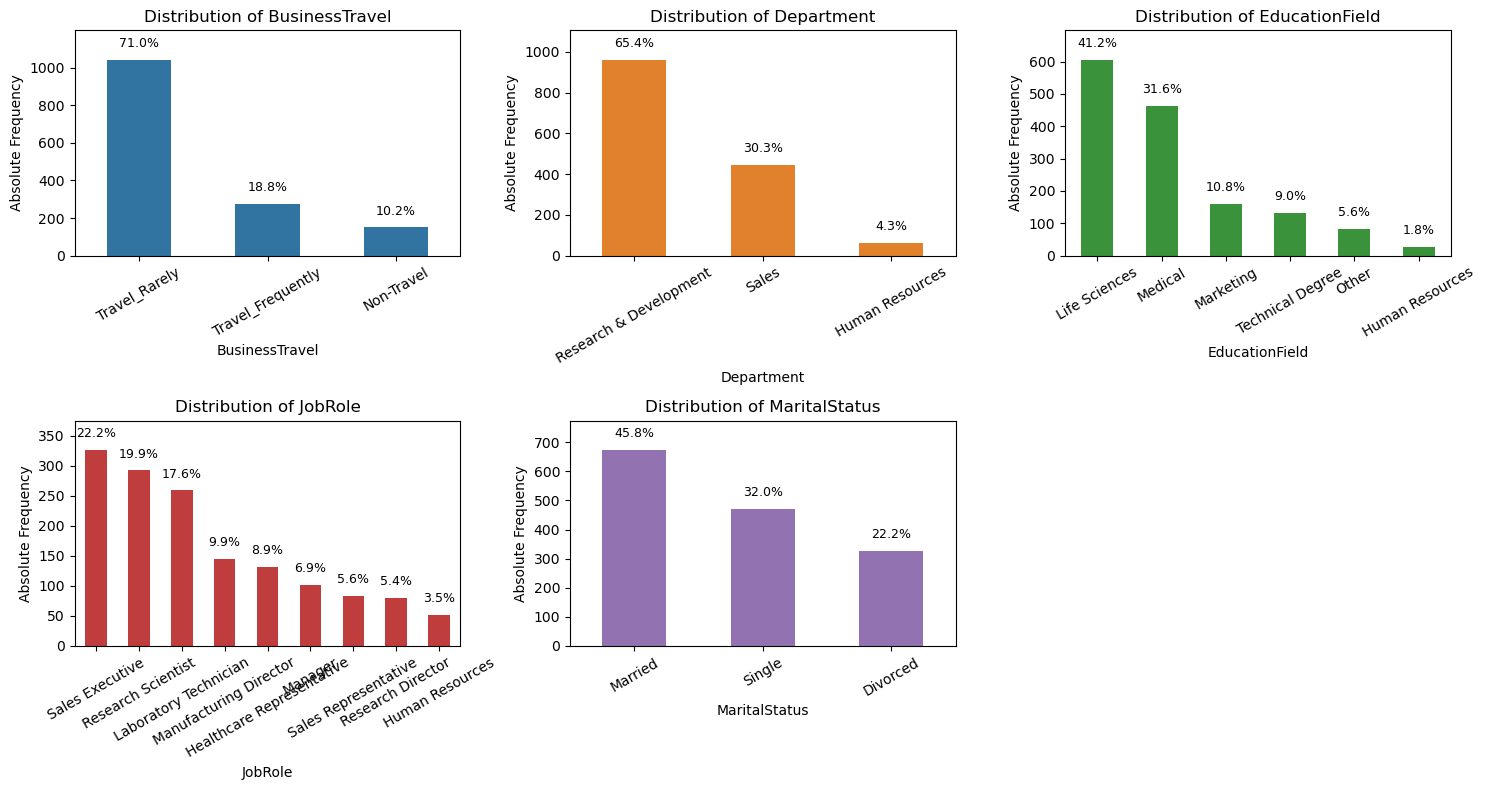

In [15]:
import math

# number of categorical variables
n_plots = len(categorical_vars)

# number of columns per row (you can change this)
n_cols = 3

# compute required number of rows
n_rows = math.ceil(n_plots / n_cols)

# automatically generate enough colors
colors = sns.color_palette("tab10", n_plots)

# create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# flatten axes (important when rows > 1)
axes = axes.flatten()

# loop through each categorical variable and plot
for i, col in enumerate(categorical_vars):
    
    # calculate absolute and relative frequencies
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True) * 100

    # bar plot
    sns.barplot(
        x=freq_abs.index,
        y=freq_abs.values,
        ax=axes[i],
        color=colors[i],
        width=0.5
    )

    # formatting
    max_val = freq_abs.values.max()
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_ylabel("Absolute Frequency")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis="x", rotation=30)
    axes[i].set_ylim(0, max_val * 1.15)

    # add relative frequency labels
    for j, val in enumerate(freq_abs.values):
        axes[i].text(
            j,
            val + max_val*0.05,
            f"{freq_rel.values[j]:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )

# remove empty subplots (important when grid > number of plots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **3.2.2 Numerical Variables**

**3.2.2.1 Frequency distribution**

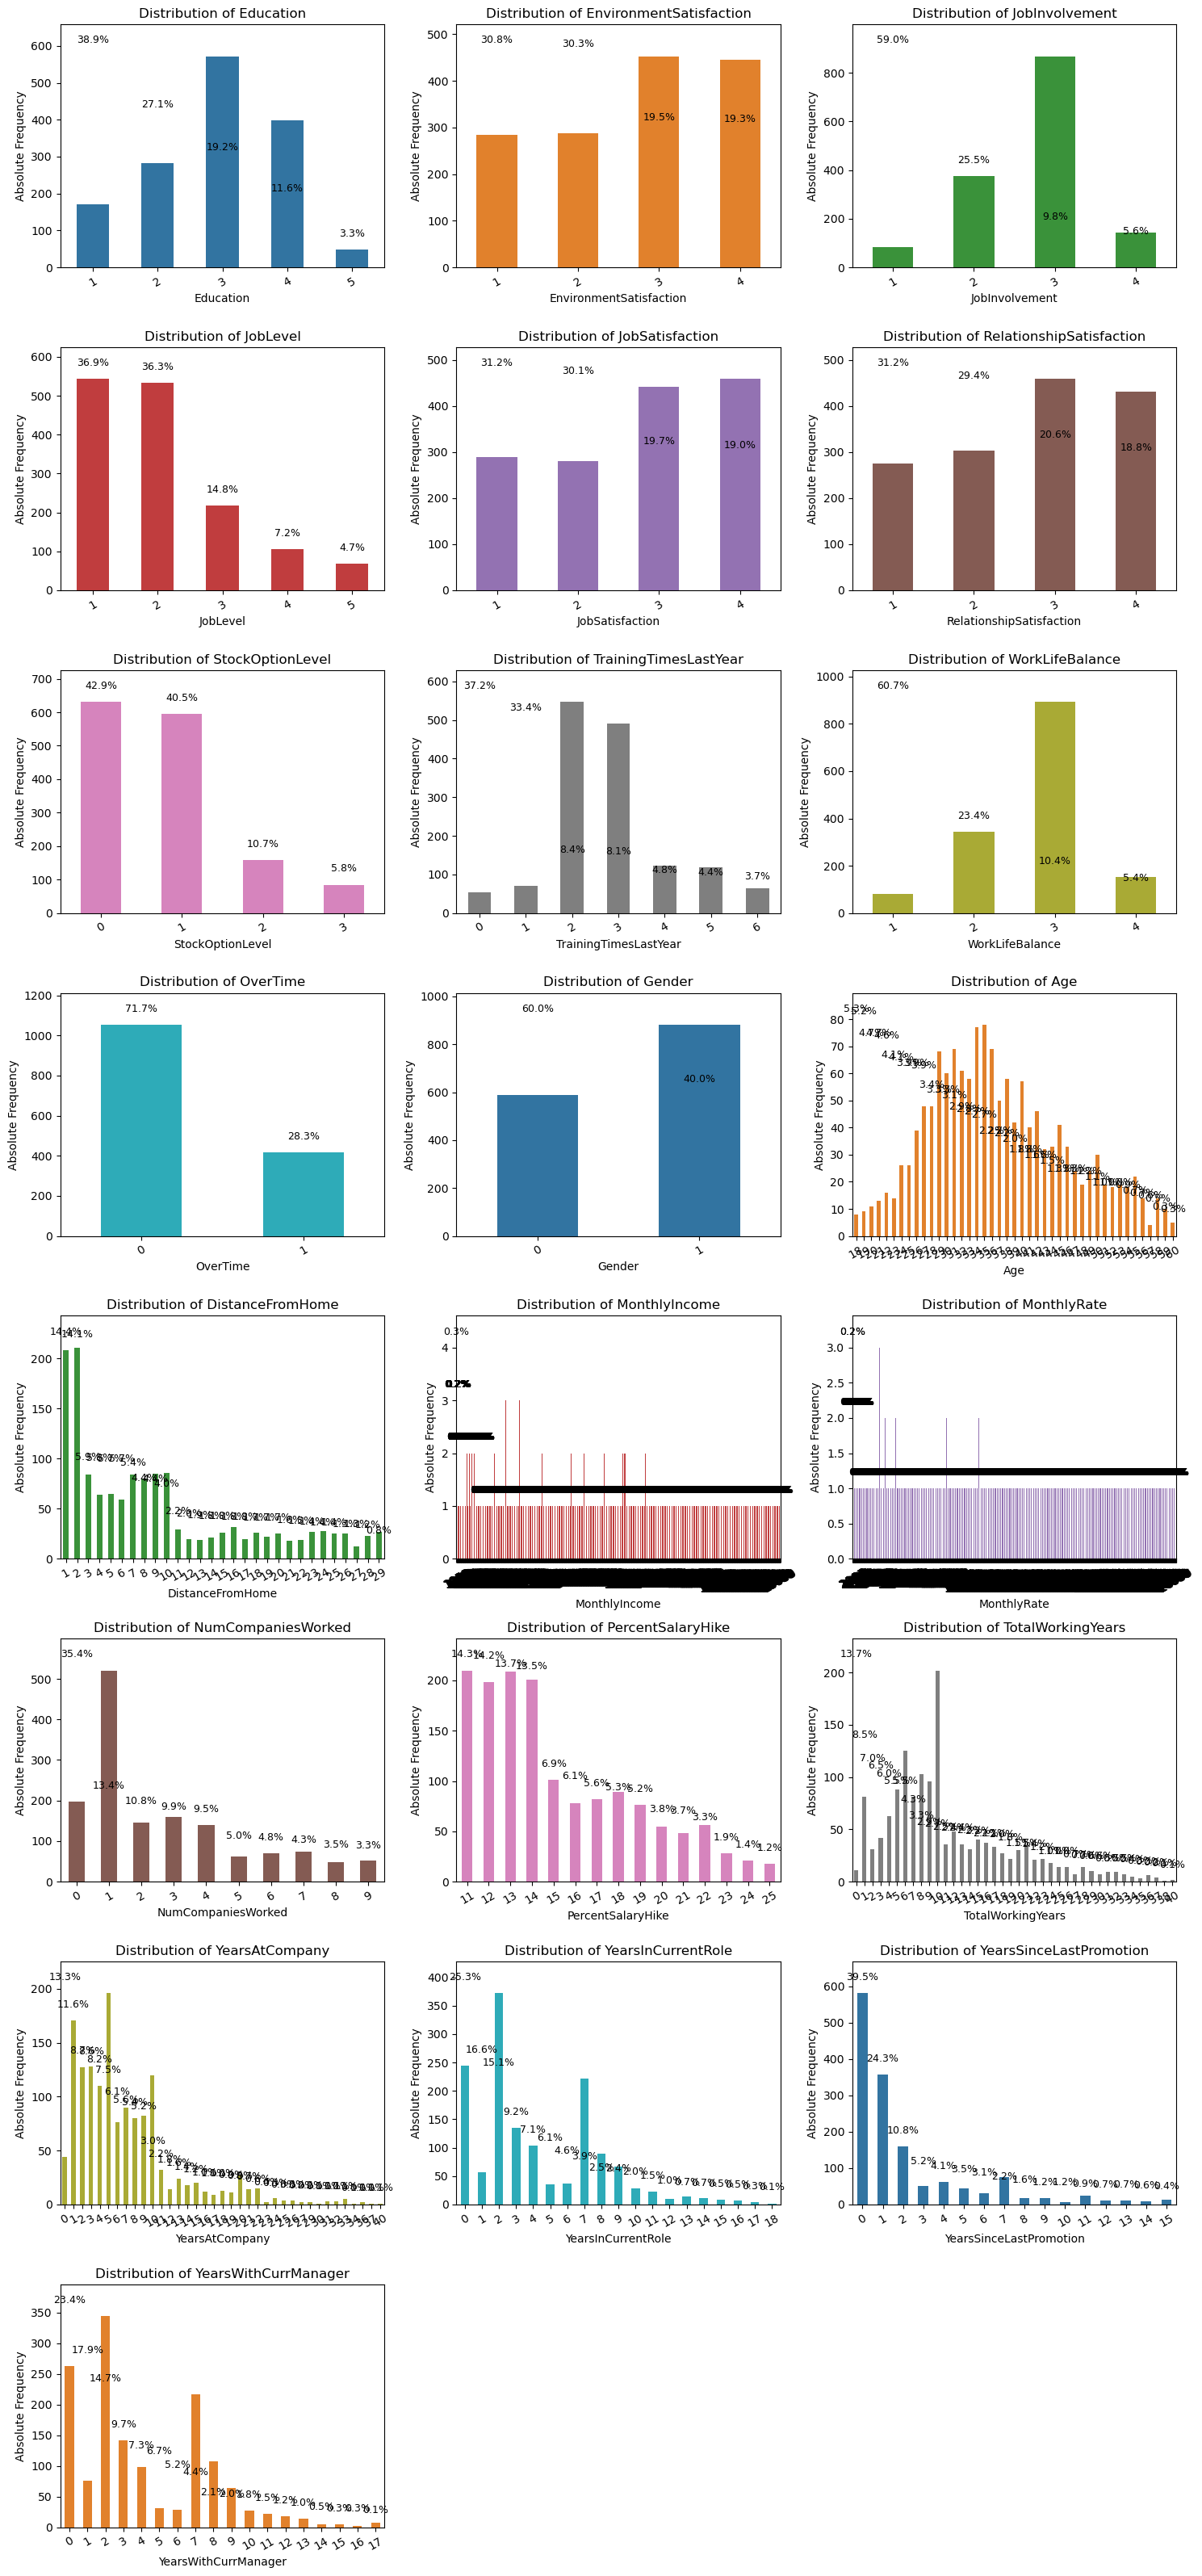

In [16]:
import math

# number of ordinal variables
n_plots = len(numerical_vars)

# number of columns per row
n_cols = 3

# compute required number of rows
n_rows = math.ceil(n_plots / n_cols)

# automatically generate enough colors
colors = sns.color_palette("tab10", n_plots)

# create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# flatten axes (important when rows > 1)
axes = axes.flatten()

# loop through each ordinal variable and plot
for i, col in enumerate(numerical_vars):

    # calculate absolute and relative frequencies
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True) * 100

    # bar plot
    sns.barplot(
        x=freq_abs.index,
        y=freq_abs.values,
        ax=axes[i],
        color=colors[i],
        width=0.5
    )

    # formatting
    max_val = freq_abs.values.max()
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_ylabel("Absolute Frequency")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis="x", rotation=30)
    axes[i].set_ylim(0, max_val * 1.15)

    # add relative frequency labels
    for j, val in enumerate(freq_abs.values):
        axes[i].text(
            j,
            val + max_val * 0.05,
            f"{freq_rel.values[j]:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**3.2.2.2 Box Plots**

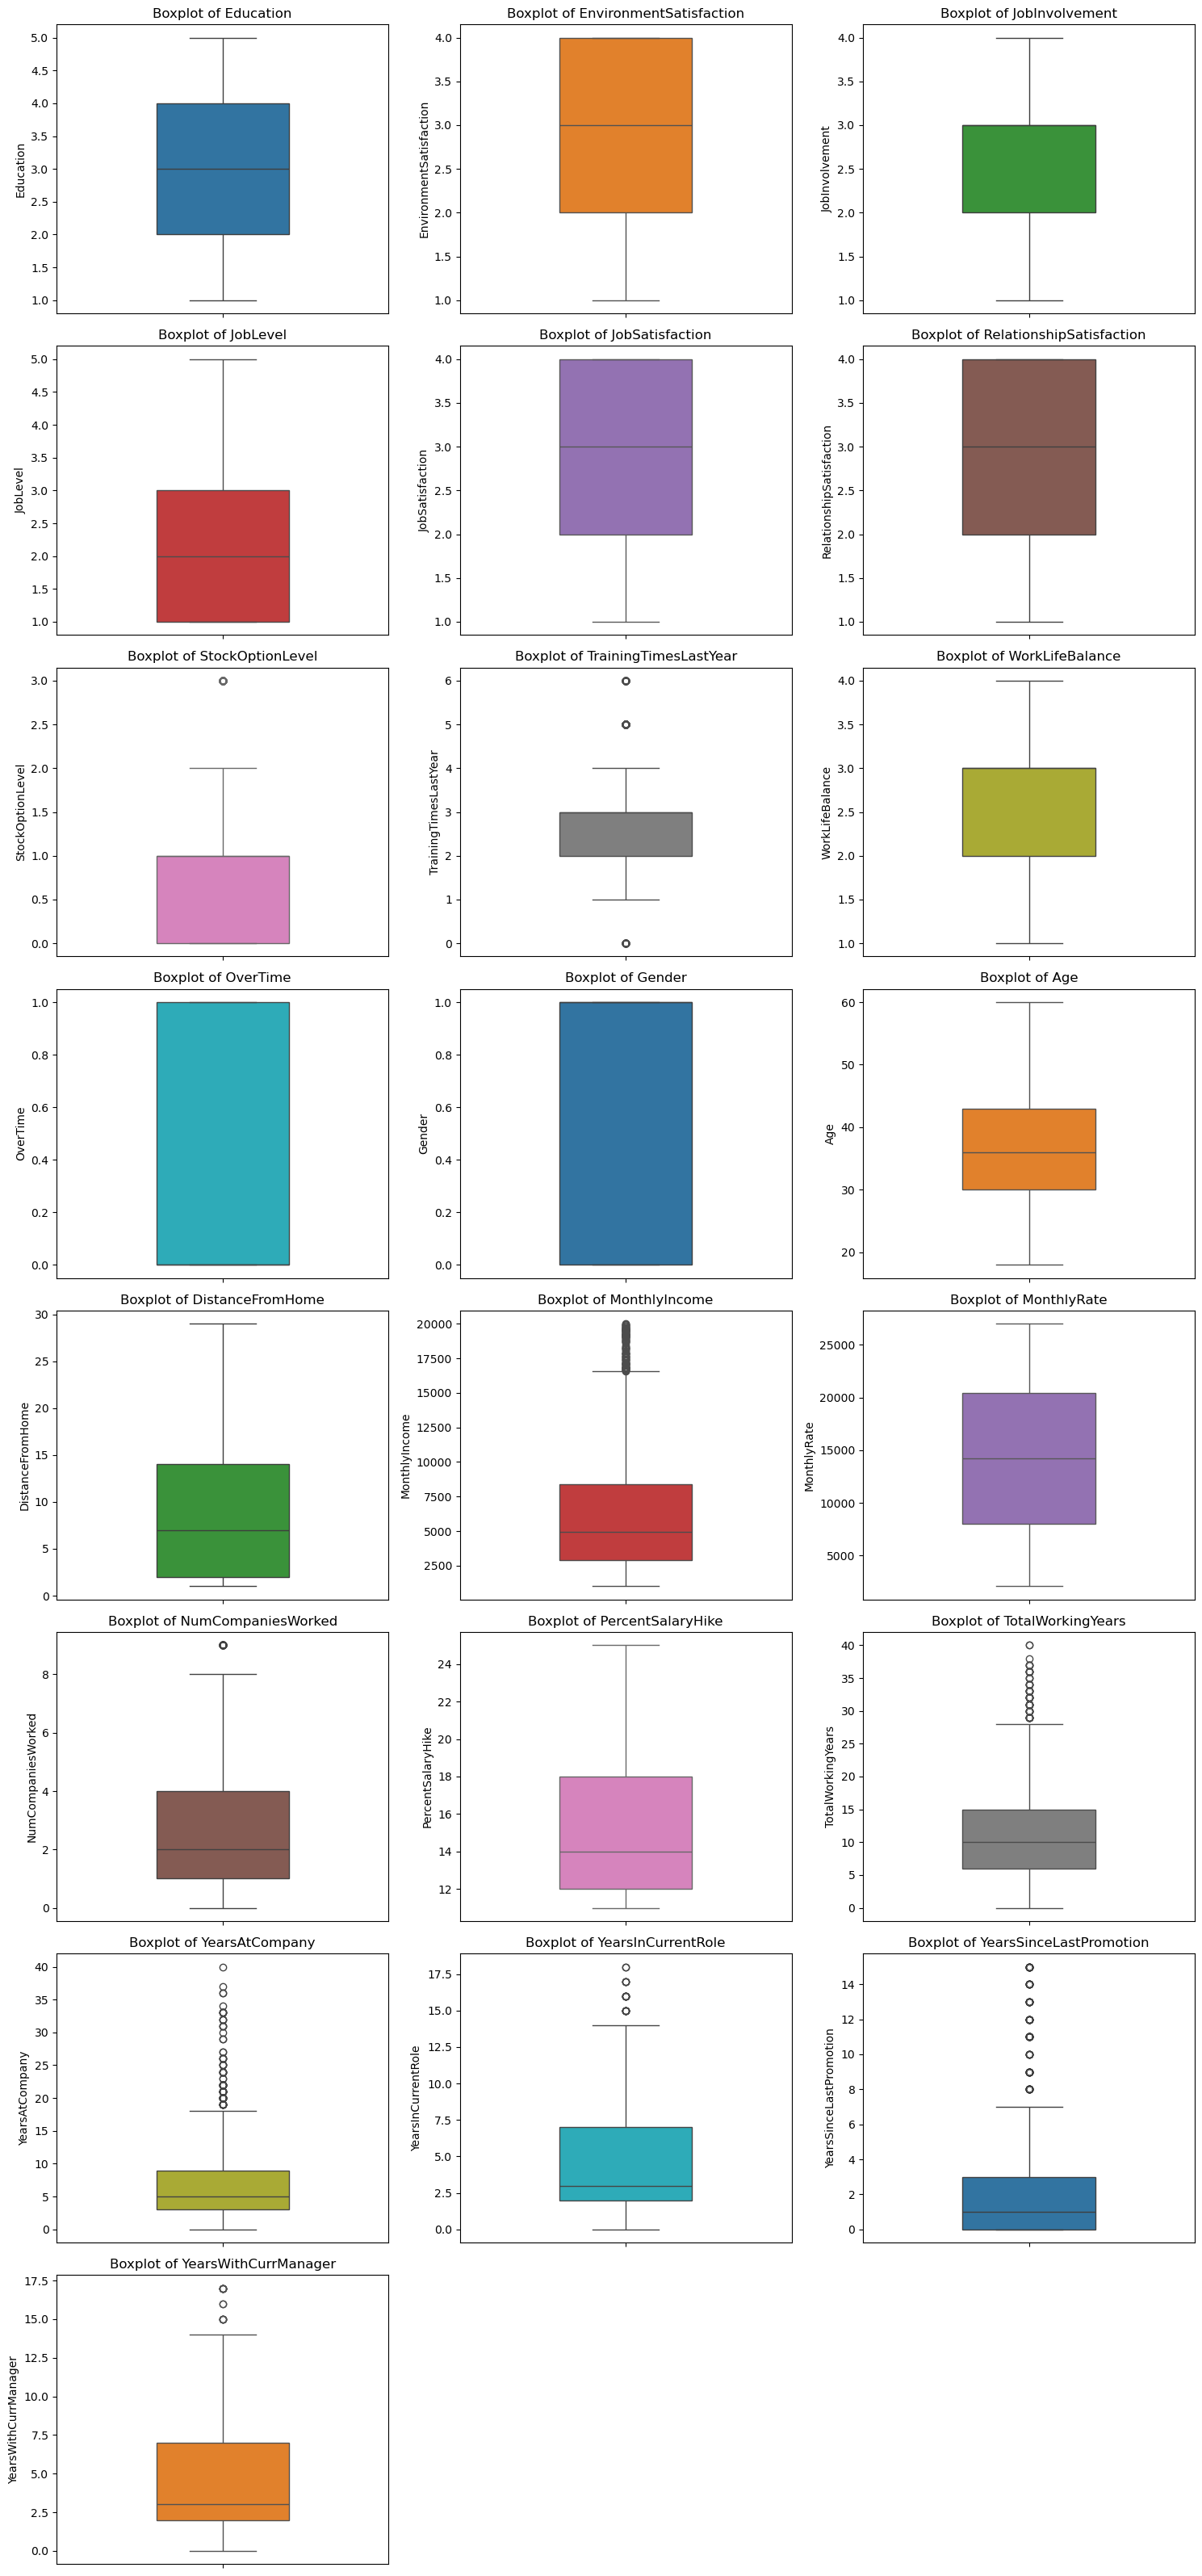

In [17]:
# number of plots
n_plots = len(numerical_vars)

# layout
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

# SAME color logic as before
colors = sns.color_palette("tab10", n_plots)

# create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_vars):
    
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        width=0.4,
        color=colors[i]   # <-- same color per variable
    )
    
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(col)

# remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **3.2.3 Continuous Variables**

**3.2.3.1 Histograms & Kernel density plots**

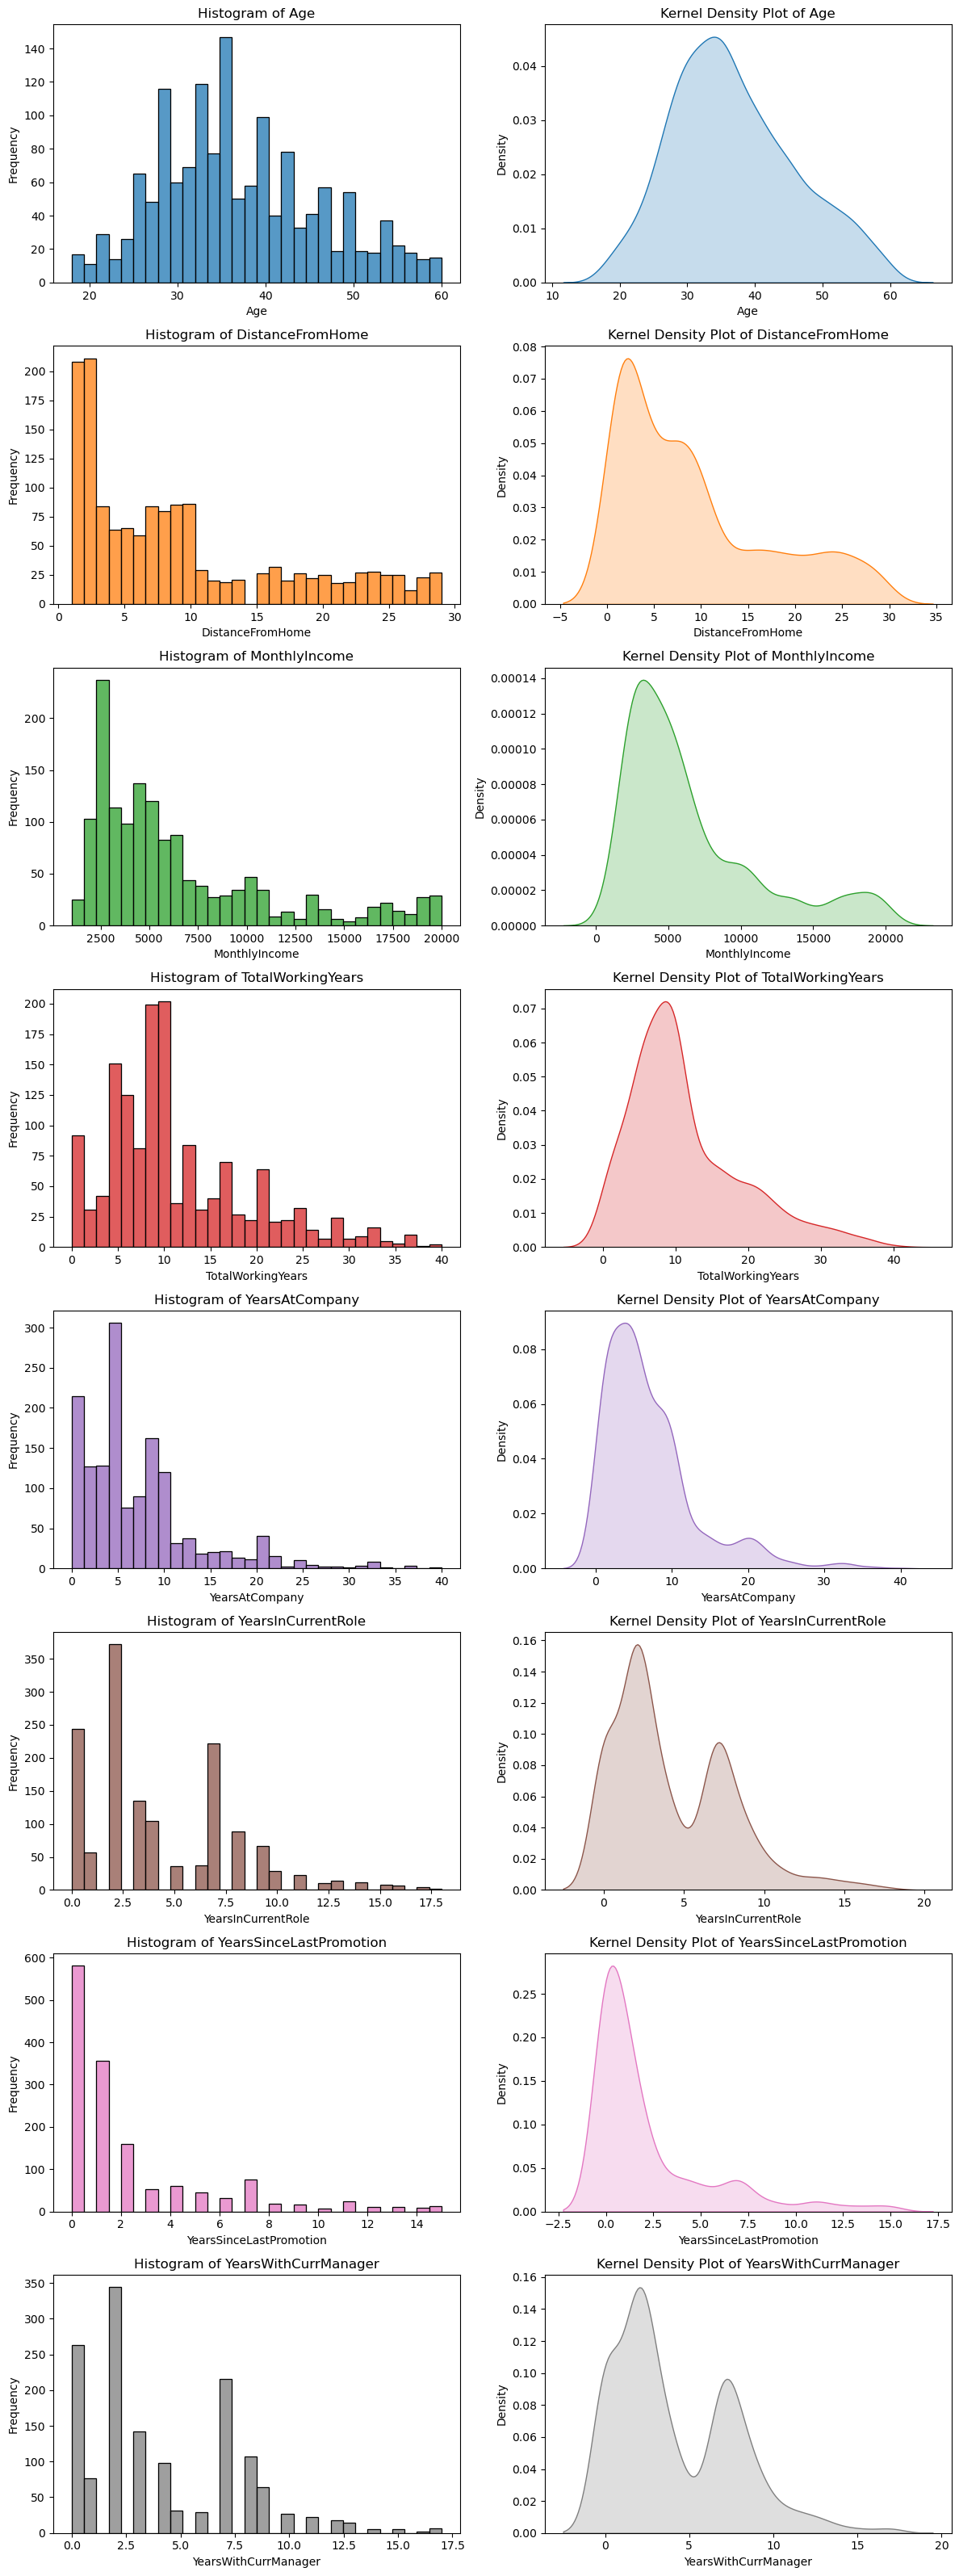

In [18]:
#Consider the distribution of discrete variables with high cardinality as continuous for further analysis
continuous_vars = [
    "Age",
    "DistanceFromHome",
    "MonthlyIncome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

n_vars = len(continuous_vars)

# Create color palette (same logic as before)
colors = sns.color_palette("tab10", n_vars)

fig, axes = plt.subplots(n_vars, 2, figsize=(12, 4 * n_vars))

# If only one variable → reshape axes
if n_vars == 1:
    axes = [axes]

for i, col in enumerate(continuous_vars):
    x = df[col].dropna()
    color = colors[i]

    # 1️⃣ Histogram (left)
    sns.histplot(
        x,
        bins=30,
        ax=axes[i][0],
        color=color
    )
    axes[i][0].set_title(f"Histogram of {col}")
    axes[i][0].set_xlabel(col)
    axes[i][0].set_ylabel("Frequency")

    # 2️⃣ KDE (right)
    sns.kdeplot(
        x,
        ax=axes[i][1],
        fill=True,
        color=color
    )
    axes[i][1].set_title(f"Kernel Density Plot of {col}")
    axes[i][1].set_xlabel(col)
    axes[i][1].set_ylabel("Density")

plt.tight_layout()
plt.show()

**3.2.3.2 Skewness & Kurtosis**

In [19]:
results = []

for col in continuous_vars:
    x = df[col].dropna()
    results.append({
        "Variable": col,
        "Skewness": x.skew(),
        "Kurtosis": x.kurt()   # pandas = excess kurtosis (normal ≈ 0)
    })

skew_kurt_df = pd.DataFrame(results).sort_values("Variable").reset_index(drop=True).round(2)
skew_kurt_df

Variable  Skewness  Kurtosis
0                      Age      0.41     -0.40
1         DistanceFromHome      0.96     -0.22
2            MonthlyIncome      1.37      1.01
3        TotalWorkingYears      1.12      0.92
4           YearsAtCompany      1.76      3.94
5       YearsInCurrentRole      0.92      0.48
6  YearsSinceLastPromotion      1.98      3.61
7     YearsWithCurrManager      0.83      0.17

**3.2.3.3 Q-Q Plots**

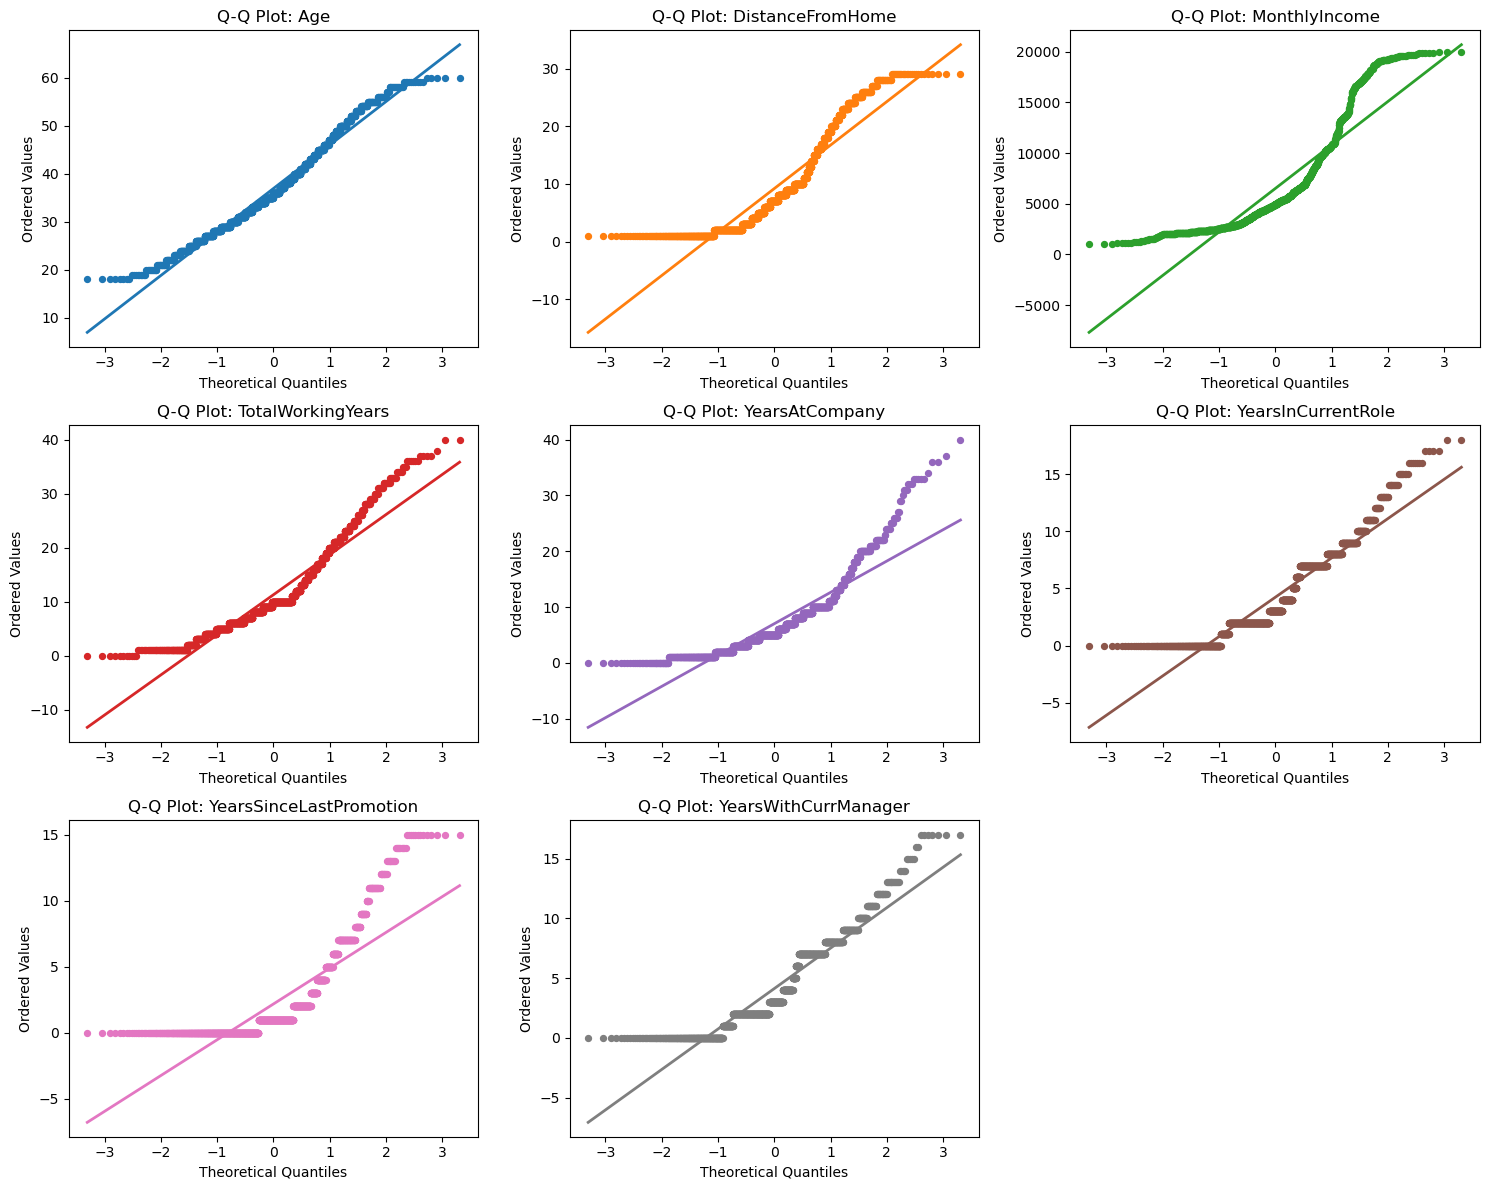

In [20]:
import scipy.stats as stats
n_plots = len(continuous_vars)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

colors = sns.color_palette("tab10", n_plots)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    x = df[col].dropna().values
    color = colors[i]

    # theoretical quantiles (osm) and ordered responses (osr)
    (osm, osr), (slope, intercept, r) = stats.probplot(x, dist="norm")

    # scatter points
    axes[i].scatter(osm, osr, color=color, s=18)

    # fitted reference line
    line_x = np.array([osm.min(), osm.max()])
    line_y = slope * line_x + intercept
    axes[i].plot(line_x, line_y, color=color, linewidth=2)

    axes[i].set_title(f"Q-Q Plot: {col}")
    axes[i].set_xlabel("Theoretical Quantiles")
    axes[i].set_ylabel("Ordered Values")

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**3.2.3.4 Log Transformation**

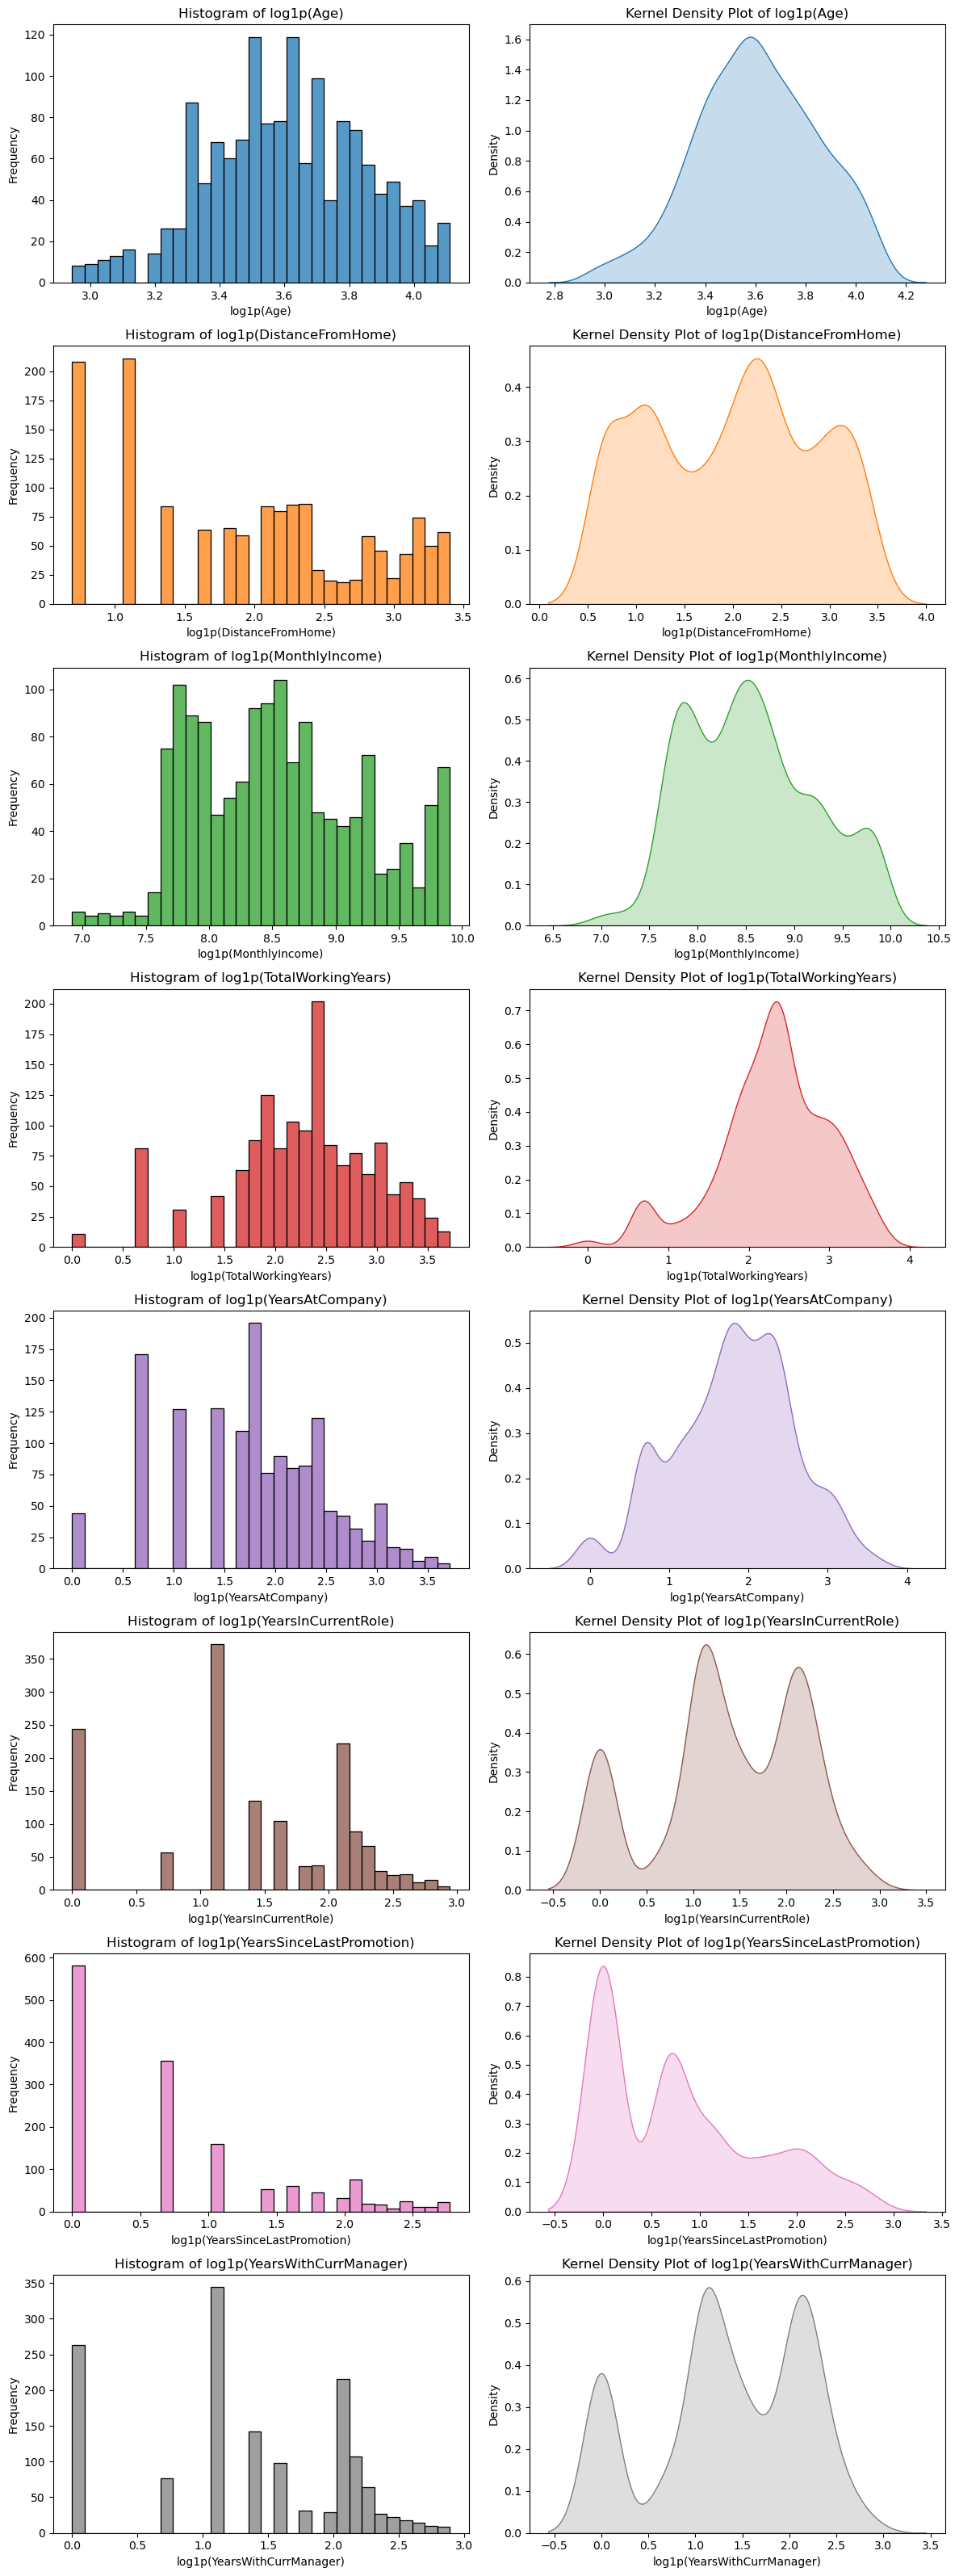

In [21]:
n_vars = len(continuous_vars)

fig, axes = plt.subplots(n_vars, 2, figsize=(12, 4 * n_vars))

# Fix for single variable case
if n_vars == 1:
    axes = [axes]

colors = sns.color_palette("tab10", n_vars)

for i, col in enumerate(continuous_vars):
    
    x = df[col].dropna()
    log_x = np.log1p(x)  # log1p used — safe for zero values (log1p(0)=0, log(0)=-inf)
    color = colors[i]
    
    # ---- Histogram (left) ----
    sns.histplot(
        log_x,
        bins=30,
        ax=axes[i][0],
        color=color
    )
    axes[i][0].set_title(f"Histogram of log1p({col})")
    axes[i][0].set_xlabel(f"log1p({col})")
    axes[i][0].set_ylabel("Frequency")
    
    # ---- KDE (right) ----
    sns.kdeplot(
        log_x,
        ax=axes[i][1],
        fill=True,
        color=color
    )
    axes[i][1].set_title(f"Kernel Density Plot of log1p({col})")
    axes[i][1].set_xlabel(f"log1p({col})")
    axes[i][1].set_ylabel("Density")

plt.tight_layout()
plt.show()

In [22]:
results_log = []

for col in continuous_vars:
    x = df[col].dropna()
    log_x = np.log1p(x)  # log1p used — safe for zero values

    results_log.append({
        "Variable": col,
        "Log Skewness": log_x.skew(),
        "Log Kurtosis": log_x.kurt()
    })

log_stats_df = pd.DataFrame(results_log).round(2)
log_stats_df

Variable  Log Skewness  Log Kurtosis
0                      Age         -0.14         -0.35
1         DistanceFromHome         -0.03         -1.22
2            MonthlyIncome          0.29         -0.70
3        TotalWorkingYears         -0.62          0.52
4           YearsAtCompany         -0.21         -0.28
5       YearsInCurrentRole         -0.38         -0.79
6  YearsSinceLastPromotion          0.72         -0.60
7     YearsWithCurrManager         -0.36         -0.91

**3.2.3.5 Squared Transformation**

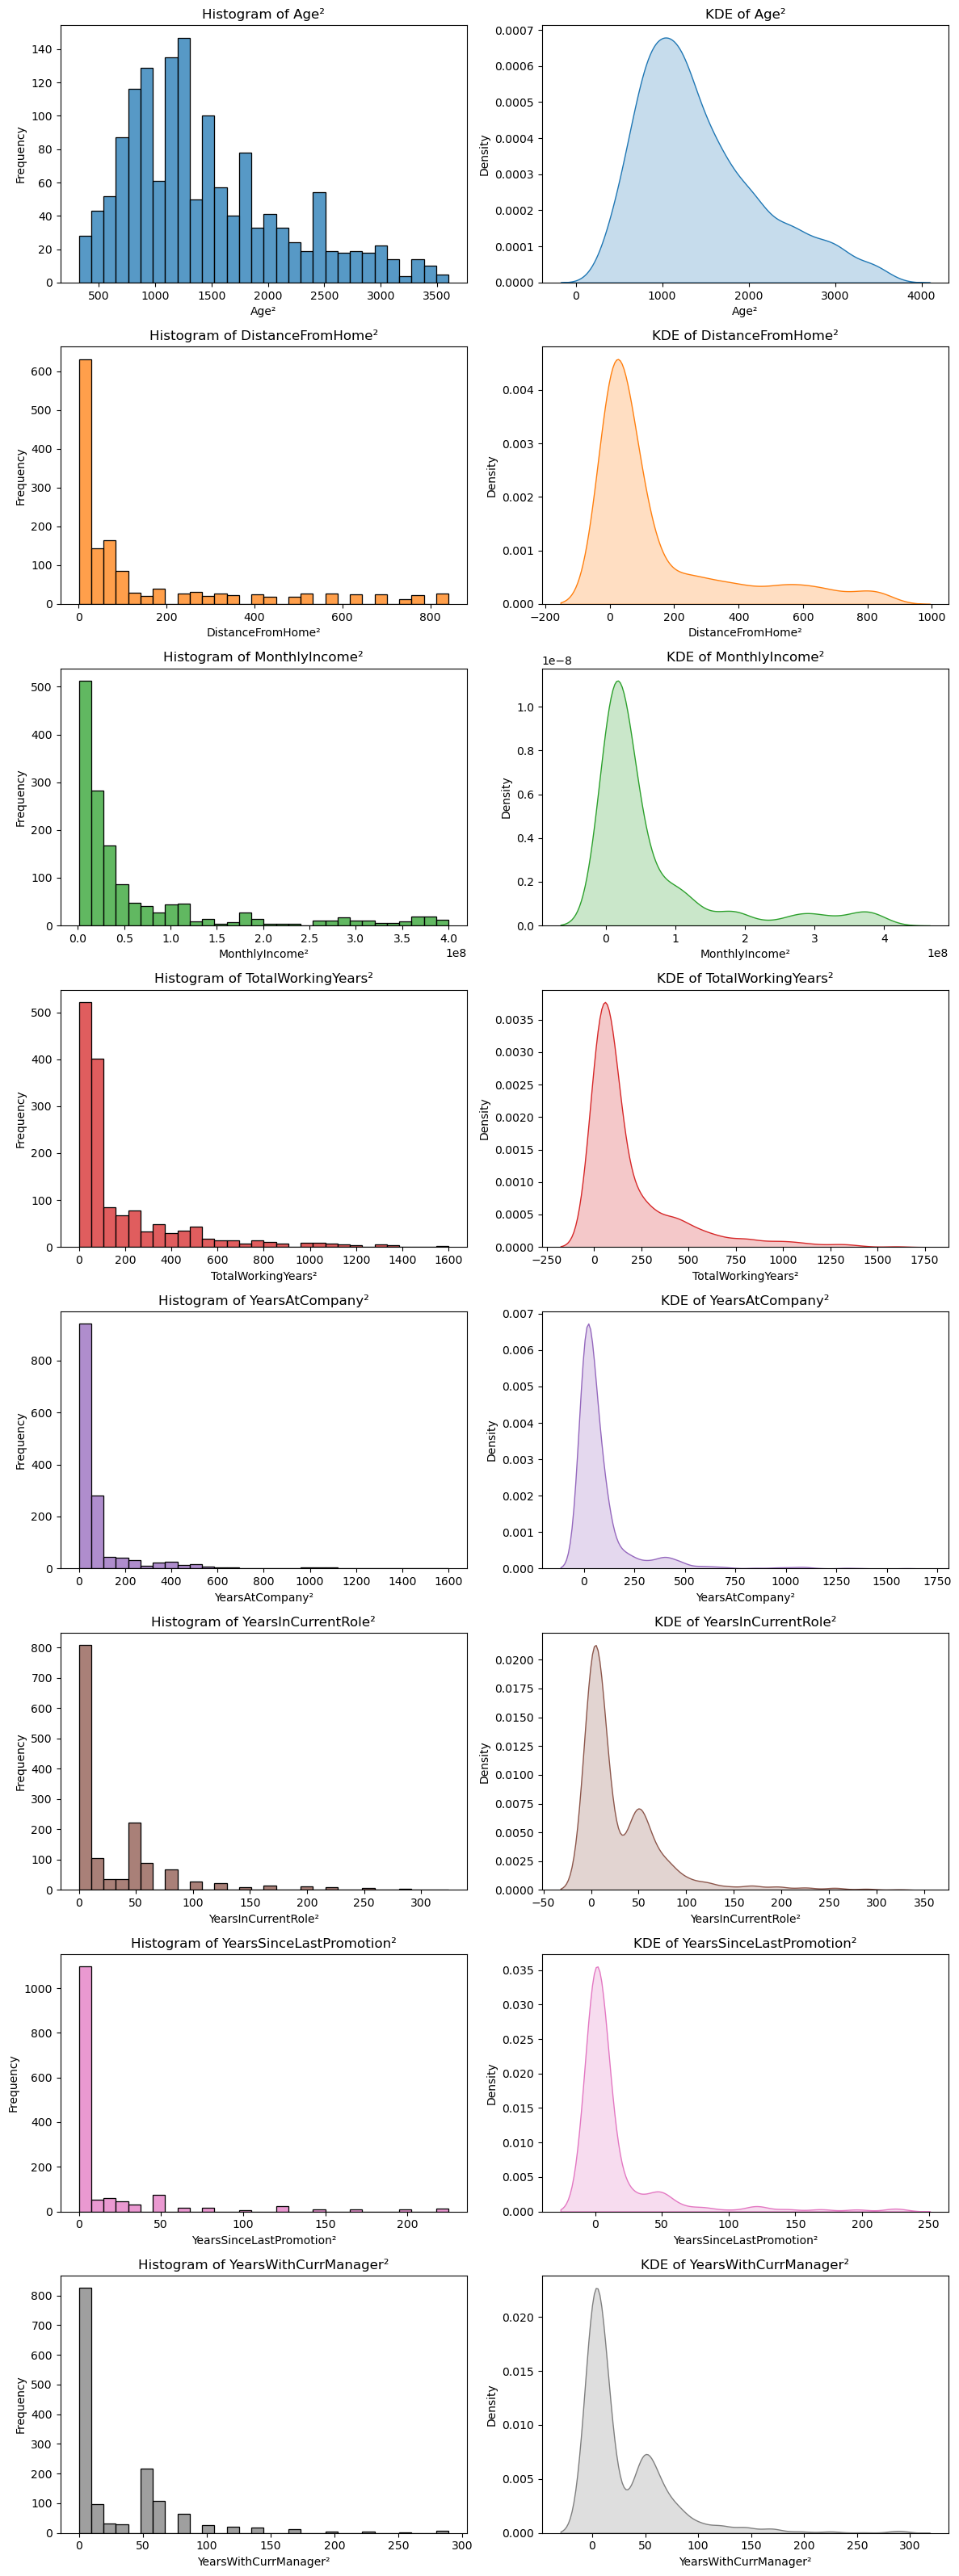

In [23]:
n_vars = len(continuous_vars)
colors = sns.color_palette("tab10", n_vars)

fig, axes = plt.subplots(n_vars, 2, figsize=(12, 4 * n_vars))

if n_vars == 1:
    axes = [axes]

for i, col in enumerate(continuous_vars):
    x = df[col].dropna()
    sq_x = x ** 2
    color = colors[i]

    # Histogram (left)
    sns.histplot(sq_x, bins=30, ax=axes[i][0], color=color)
    axes[i][0].set_title(f"Histogram of {col}²")
    axes[i][0].set_xlabel(f"{col}²")
    axes[i][0].set_ylabel("Frequency")

    # KDE (right)
    sns.kdeplot(sq_x, ax=axes[i][1], fill=True, color=color)
    axes[i][1].set_title(f"KDE of {col}²")
    axes[i][1].set_xlabel(f"{col}²")
    axes[i][1].set_ylabel("Density")

plt.tight_layout()
plt.show()

In [24]:
results_sq = []

for col in continuous_vars:
    x = df[col].dropna()
    sq_x = x ** 2

    results_sq.append({
        "Variable": col,
        "Squared Skewness": sq_x.skew(),
        "Squared Kurtosis": sq_x.kurt()
    })

sq_stats_df = pd.DataFrame(results_sq).round(2)
sq_stats_df

Variable  Squared Skewness  Squared Kurtosis
0                      Age              0.90              0.21
1         DistanceFromHome              1.71              1.83
2            MonthlyIncome              2.15              3.70
3        TotalWorkingYears              2.36              6.04
4           YearsAtCompany              4.10             21.57
5       YearsInCurrentRole              2.68              9.33
6  YearsSinceLastPromotion              3.58             13.84
7     YearsWithCurrManager              2.54              9.01

#### **3.3 Bivariate Analysis**


**3.3.1 Stratified Boxplots**

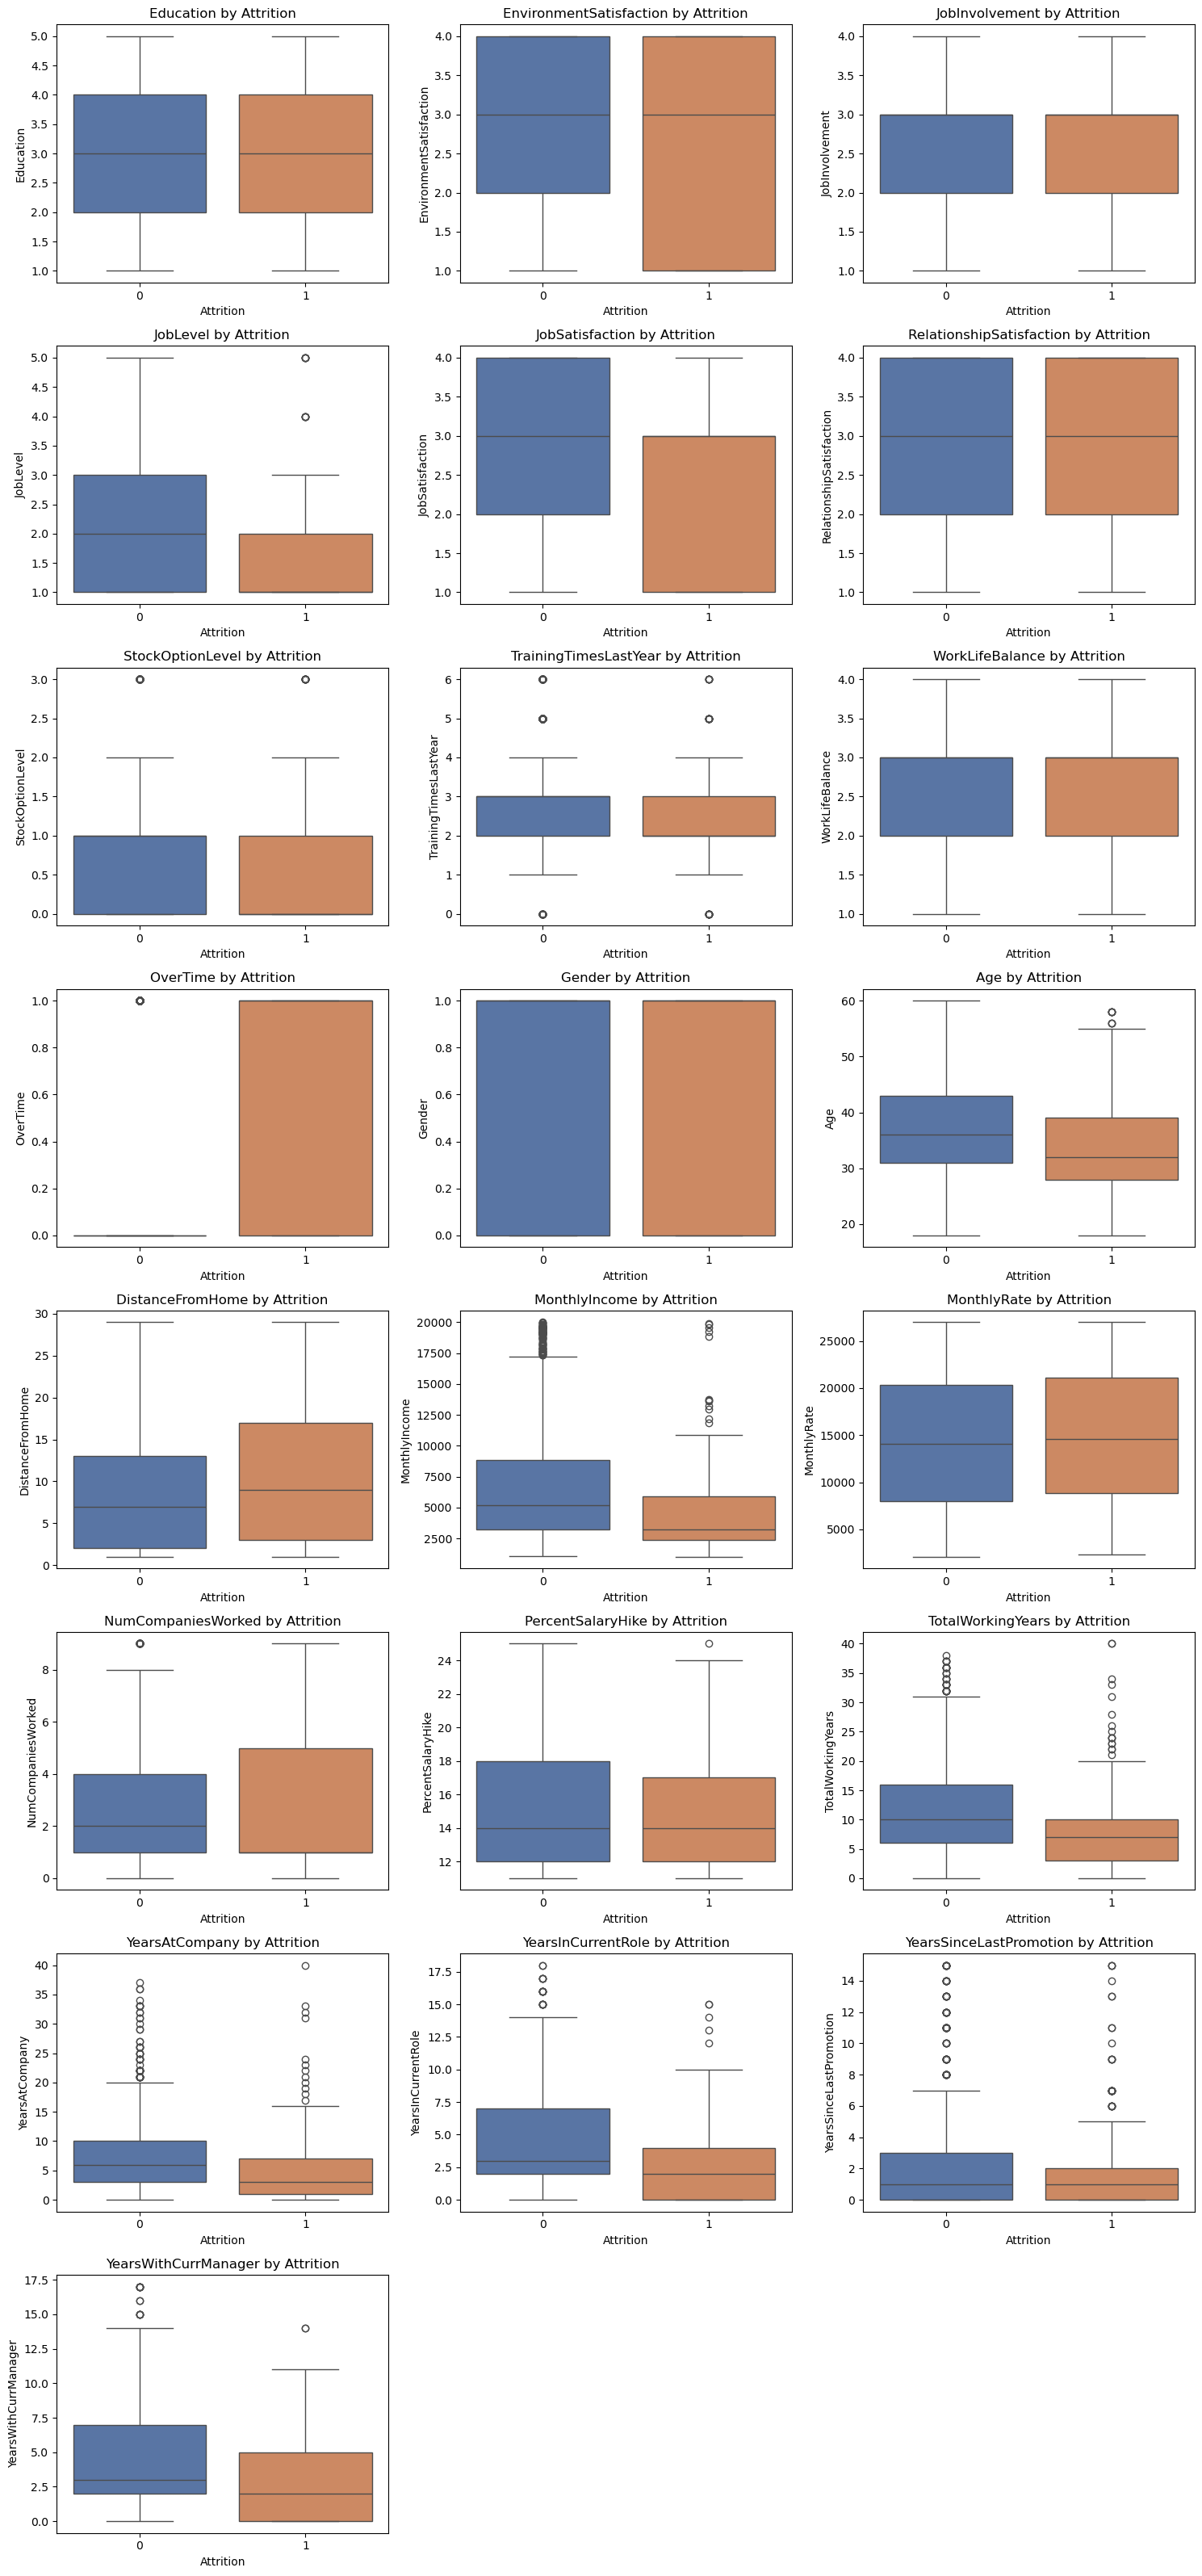

In [25]:
n_plots = len(numerical_vars)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

colors = sns.color_palette("tab10", n_plots)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_vars):
    
    sns.boxplot(
        x=df["Attrition"],
        y=df[col],
        ax=axes[i],
        palette=["#4C72B0", "#DD8452"]  # consistent class colors
    )
    
    axes[i].set_title(f"{col} by Attrition")
    axes[i].set_xlabel("Attrition")
    axes[i].set_ylabel(col)

# remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**3.3.2 Correlation with Attrition**

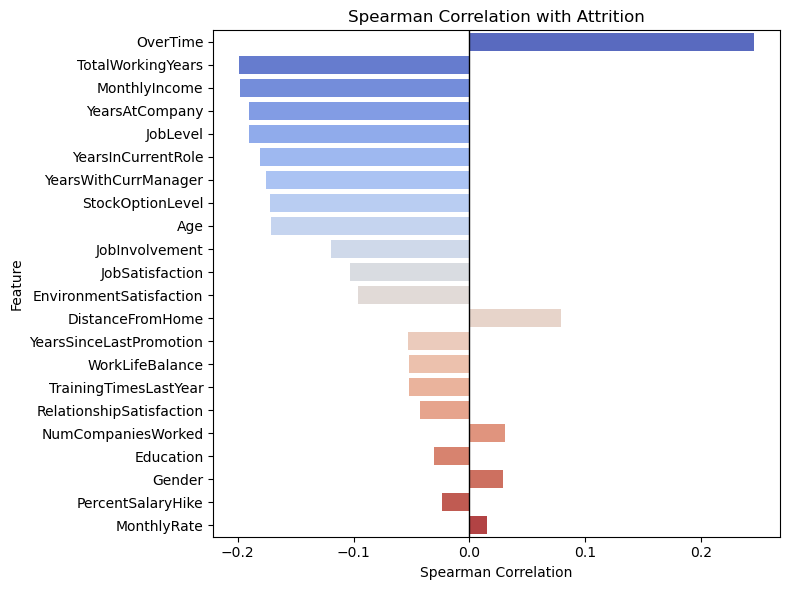

In [26]:
# Compute Spearman correlations
correlations = []

for col in numerical_vars:
    corr = df[[col, "Attrition"]].corr(method="spearman").iloc[0, 1]
    correlations.append({
        "Variable": col,
        "Spearman Correlation": corr
    })

# Create DataFrame
spearman_df = pd.DataFrame(correlations)

# Sort by absolute correlation (strongest at top)
spearman_df = spearman_df.reindex(
    spearman_df["Spearman Correlation"].abs().sort_values(ascending=False).index
)

# ---- Visualization ----
plt.figure(figsize=(8, 6))

sns.barplot(
    data=spearman_df,
    x="Spearman Correlation",
    y="Variable",
    palette="coolwarm"
)

plt.axvline(0, color="black", linewidth=1)
plt.title("Spearman Correlation with Attrition")
plt.xlabel("Spearman Correlation")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()

**3.3.3 Scatterplots**

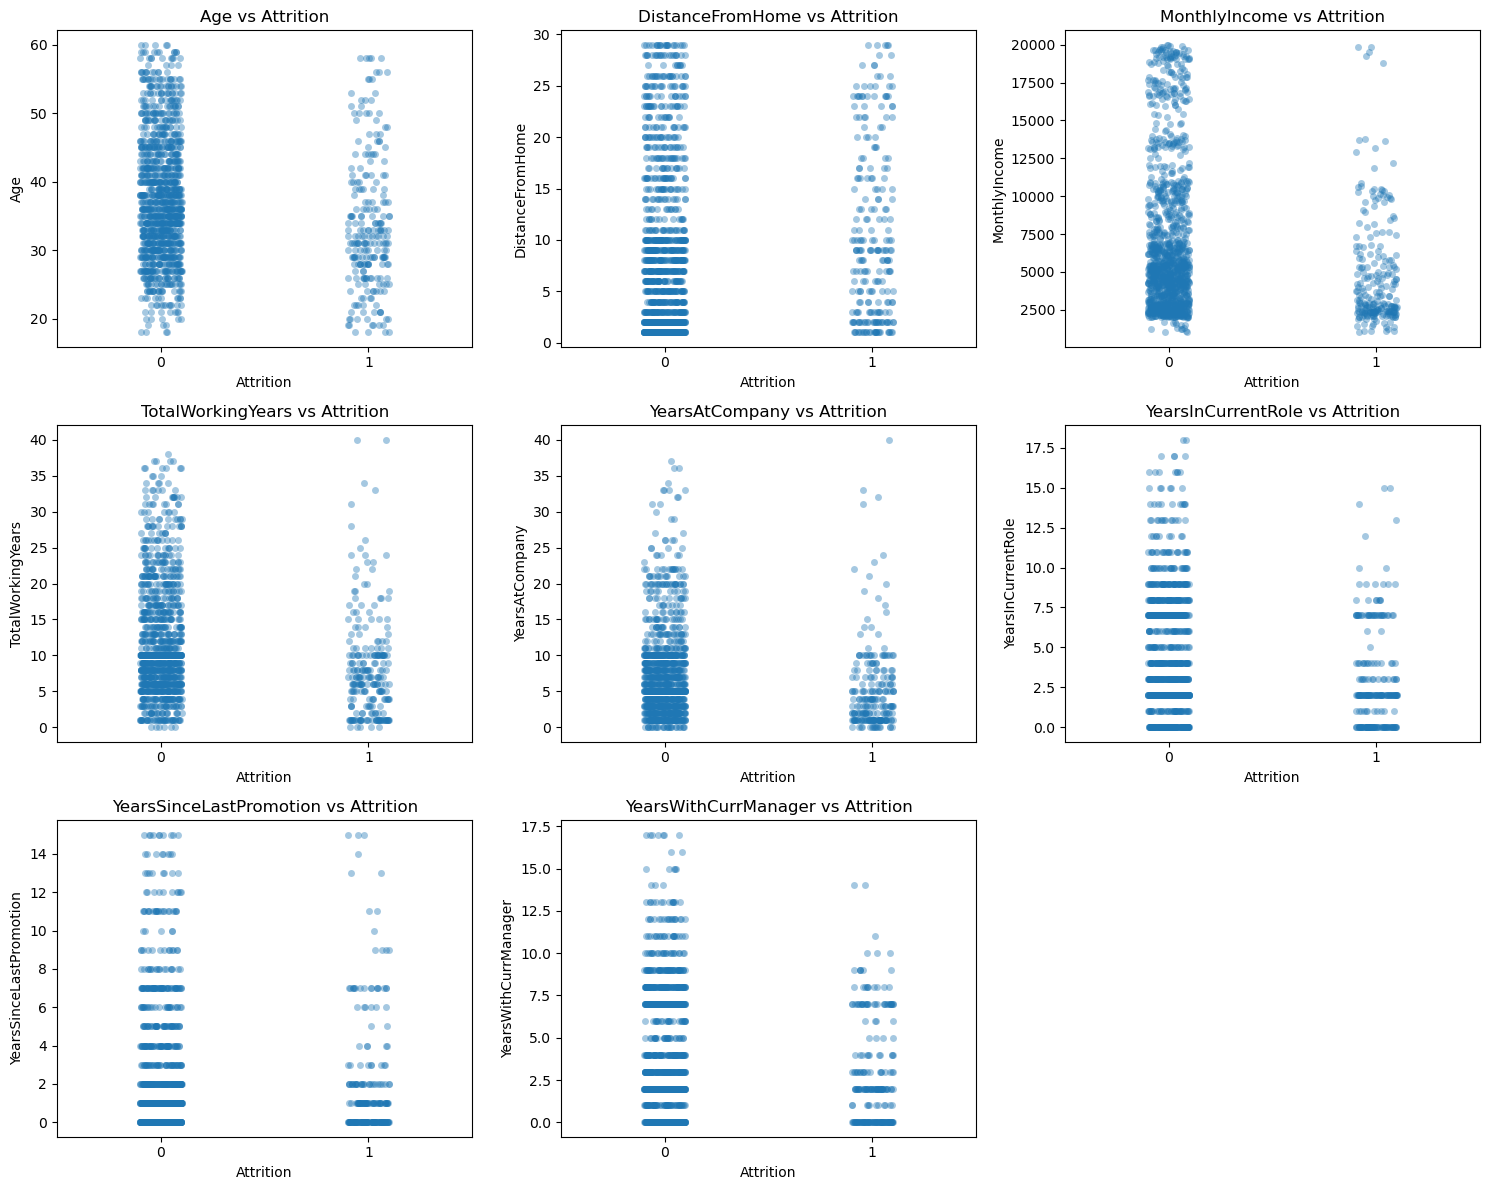

In [27]:
n_plots = len(continuous_vars)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    
    sns.stripplot(
        x=df["Attrition"],
        y=df[col],
        ax=axes[i],
        jitter=True,
        alpha=0.4
    )
    
    axes[i].set_title(f"{col} vs Attrition")
    axes[i].set_xlabel("Attrition")
    axes[i].set_ylabel(col)

# remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **3.4 Multivariate Analysis**

**3.4.1 Correlation Matrix Heatmap**

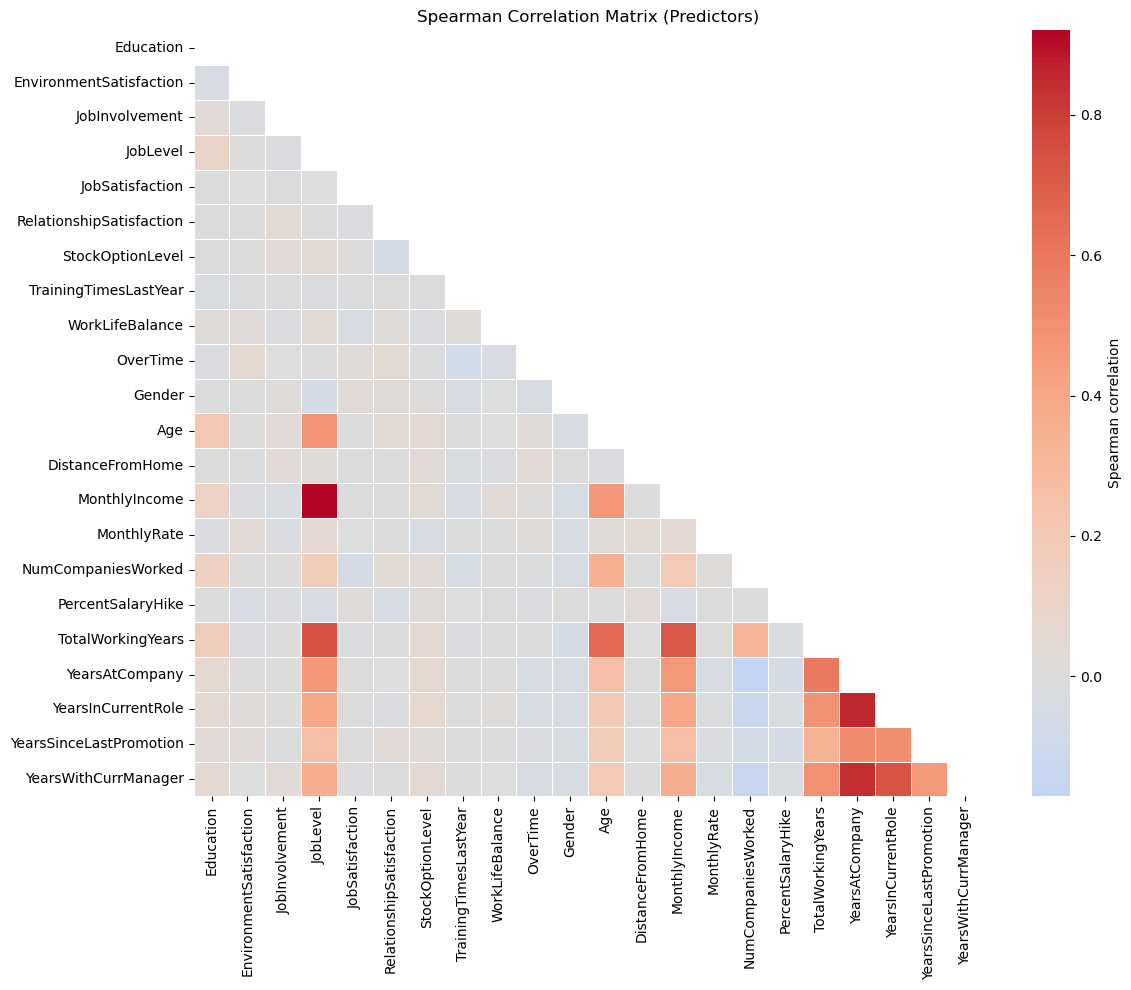

In [28]:
corr = df[numerical_vars].corr(method="spearman")

# mask upper triangle for readability
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"label": "Spearman correlation"}
)

plt.title("Spearman Correlation Matrix (Predictors)")
plt.tight_layout()
plt.show()

**3.4.2 Principal Component Analysis (PCA)**

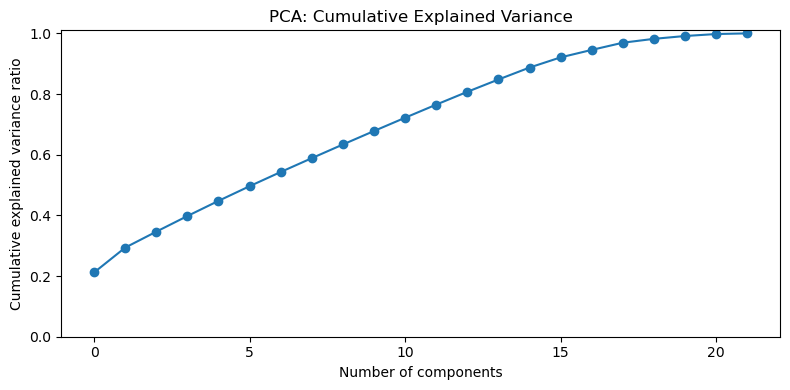

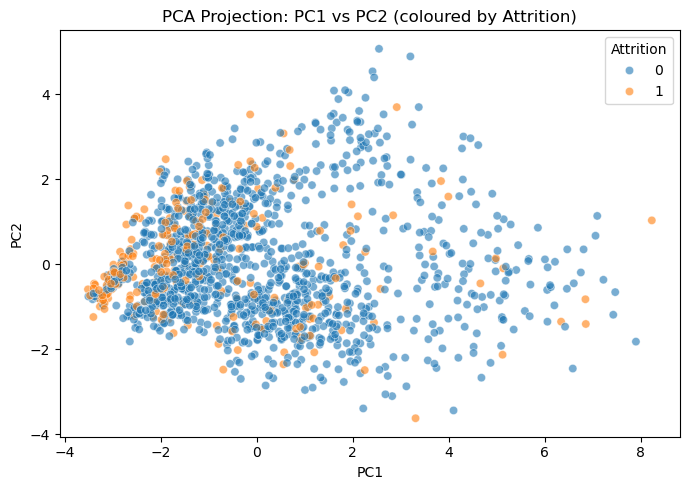

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Note: variables named X_pca_input and y_pca deliberately to avoid
# overwriting X and y used later in Section 4 (train/test split)
X_pca_input = df[numerical_vars].dropna()
y_pca = df.loc[X_pca_input.index, "Attrition"]

# Attrition is already numeric 0/1 — no mapping needed

# Scale — for EDA/visualisation purposes only, not used in modeling pipeline
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca_input)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_pca_scaled)

# --- 1) Explained variance ratio plot ---
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.title("PCA: Cumulative Explained Variance")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.ylim(0, 1.01)
plt.tight_layout()
plt.show()

# --- 2) 2D projection (PC1 vs PC2) ---
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_pca_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1], hue=y_pca, alpha=0.6)
plt.title("PCA Projection: PC1 vs PC2 (coloured by Attrition)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

**3.4.3 Interaction Efffects**

In [30]:
def interaction_heatmap(df, x_col, y_col, target="Attrition", q=5):
    tmp = df[[x_col, y_col, target]].dropna().copy()

    # map target if it's text (adjust if your labels differ)
    if tmp[target].dtype == "object":
        tmp[target] = tmp[target].map({"No Attrition": 0, "Attrition": 1})

    # quantile bins
    tmp["x_bin"] = pd.qcut(tmp[x_col], q=q, duplicates="drop")
    tmp["y_bin"] = pd.qcut(tmp[y_col], q=q, duplicates="drop")

    # target rate pivot
    pivot = tmp.pivot_table(index="y_bin", columns="x_bin", values=target, aggfunc="mean")

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, cmap="viridis", annot=True, fmt=".2f")
    plt.title(f"Interaction (Target Rate) Heatmap: {y_col} vs {x_col}\nCells = mean({target})")
    plt.xlabel(f"{x_col} (quantile bins)")
    plt.ylabel(f"{y_col} (quantile bins)")
    plt.tight_layout()
    plt.show()

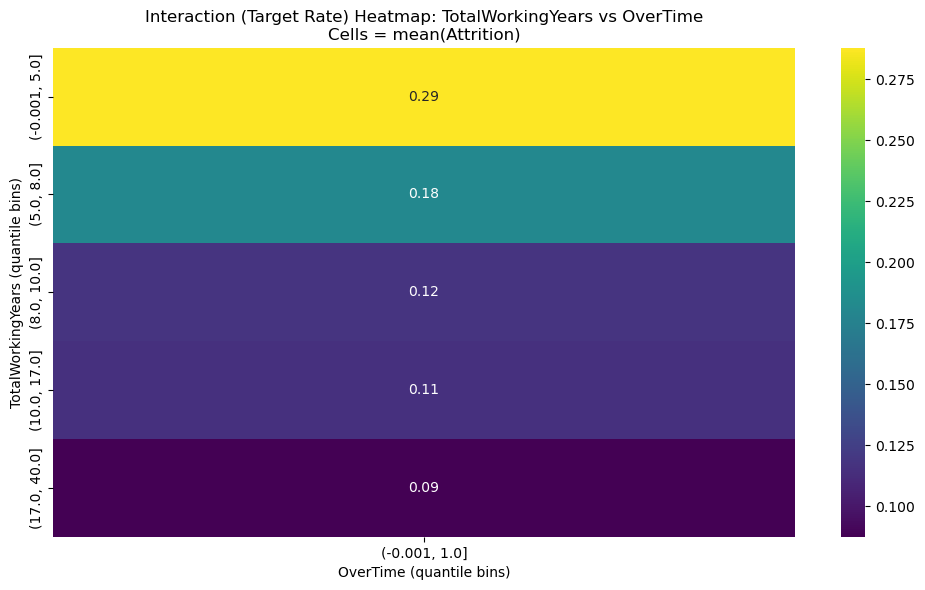

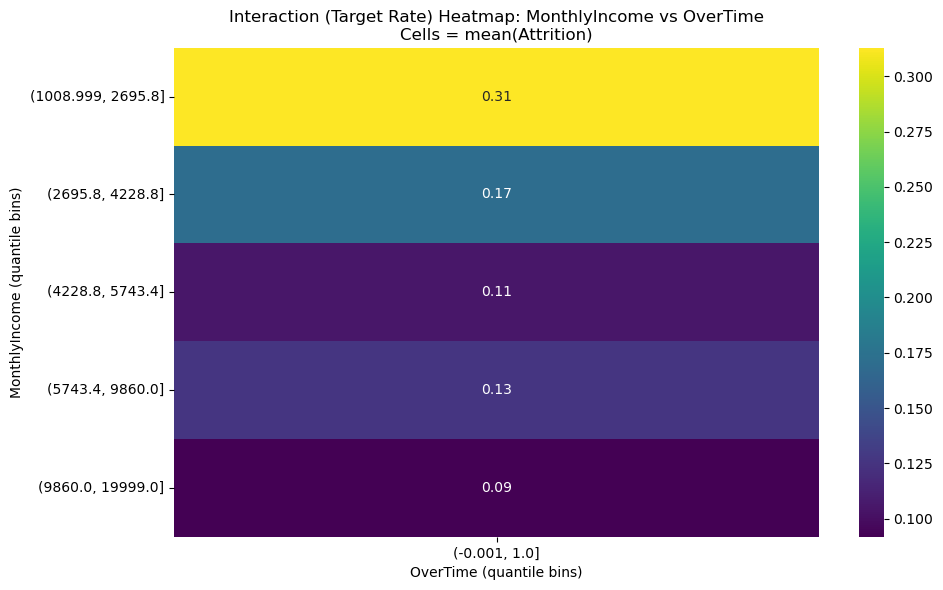

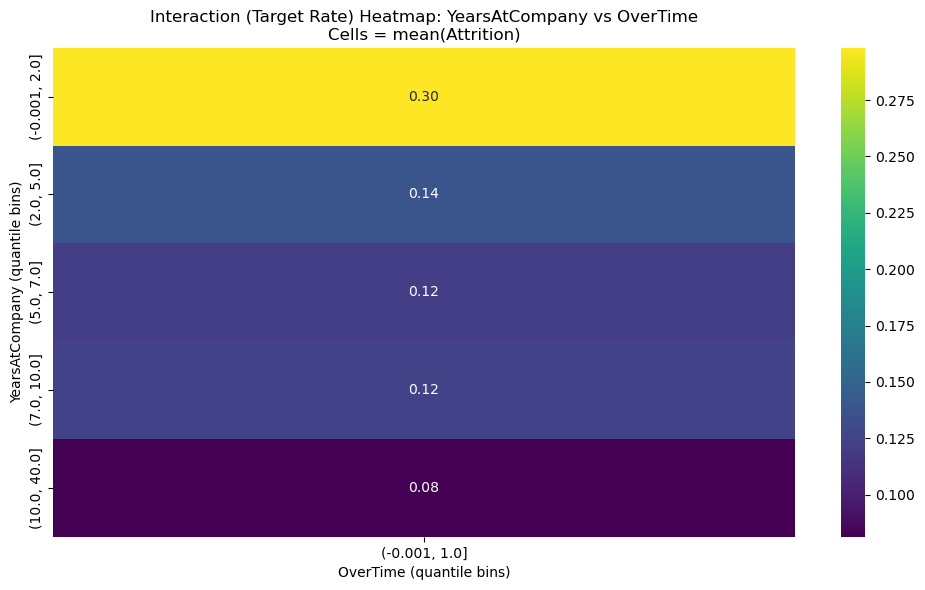

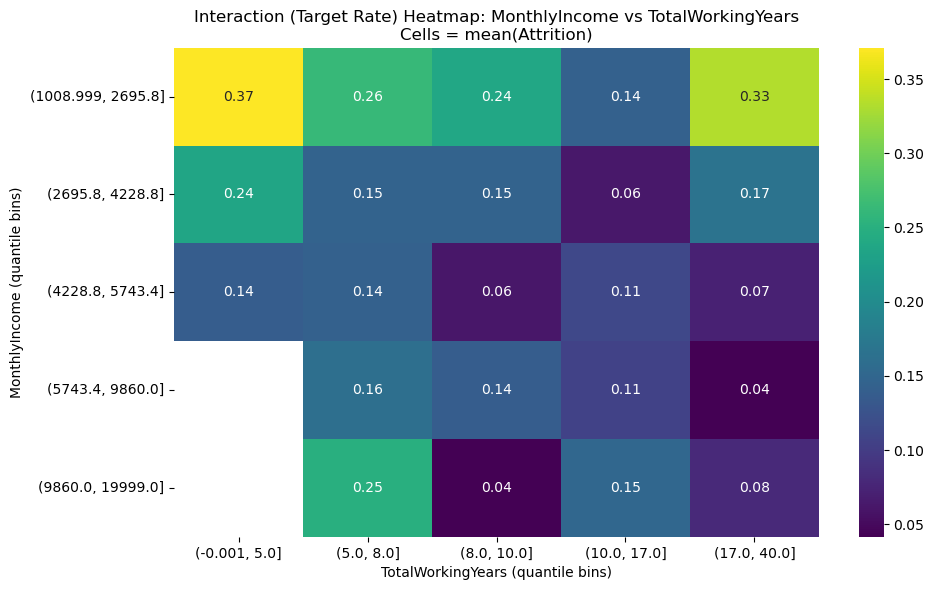

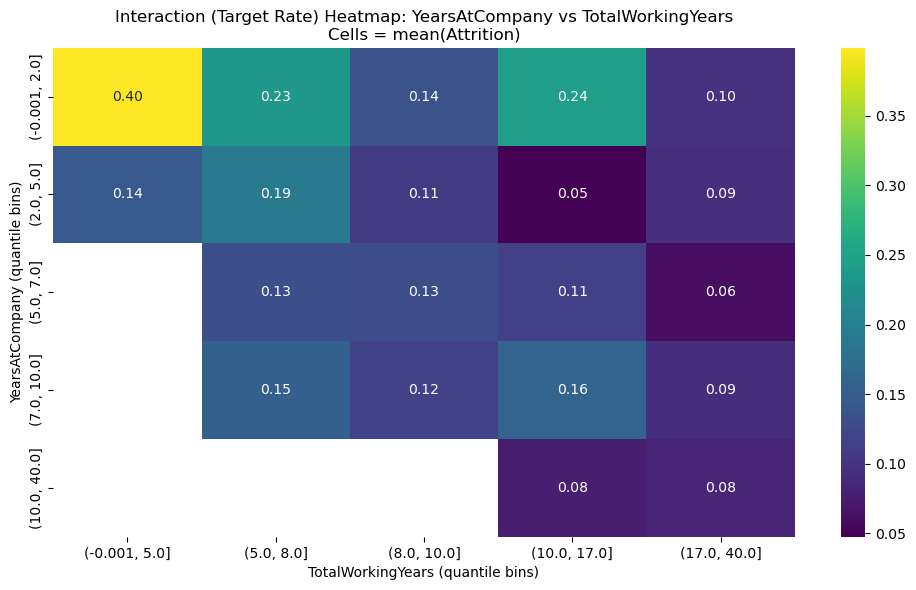

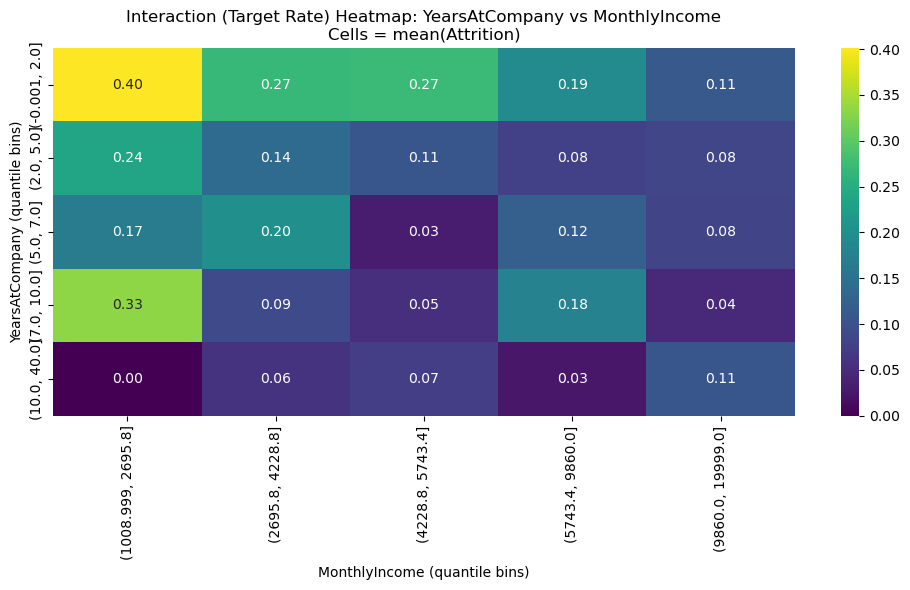

In [31]:
import itertools

# Attrition is already numeric 0/1 — compute correlations directly
tmp = df[numerical_vars + ["Attrition"]].dropna().copy()

scores = []
for col in numerical_vars:
    scores.append((col, tmp[[col, "Attrition"]].corr(method="spearman").iloc[0, 1]))

scores_df = pd.DataFrame(scores, columns=["Variable", "Spearman"]).assign(
    abs_spearman=lambda d: d["Spearman"].abs()
)
top_features = scores_df.sort_values("abs_spearman", ascending=False)["Variable"].head(4).tolist()

# plot pairwise interaction heatmaps for top 4 most correlated features
for a, b in itertools.combinations(top_features, 2):
    interaction_heatmap(df, a, b, target="Attrition", q=5)

---
## **4. Pre-Modeling Pipeline**

Now that EDA is done, this section prepares the data before running the Logistic Regression model. We engineer some new features, apply log transformations to skewed variables, split the data into training and test sets, scale and encode the features, and handle the class imbalance in the target variable.

The pipeline covers the following steps: imports, feature engineering, verification of engineered features, log transformation, defining the final feature sets, train/test split, preprocessing (scaling and encoding), class imbalance handling, assembling the full pipeline, and a final sanity check.



### **4.1 Imports**

Here we import all the sklearn tools needed for the pipeline. train_test_split divides the data into training and test sets, Pipeline and ColumnTransformer let us chain all the preprocessing steps together, StandardScaler and OneHotEncoder handle the numerical and categorical features respectively, and LogisticRegression is the model we will use in Section 5 after the Pipeline.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


### **4.2 Feature Engineering**

In this section we created new variables from the ones already existing so they better capture the underlying signal.

We created four composite features based on the following reasoning:

| Feature | Formula | What it captures |
|---|---|---|
| TenureRatio | YearsAtCompany / (TotalWorkingYears + 1) | How much of the employee's total career has been spent here. A low ratio signals job-hopping is a known attrition predictor. |
| PromotionLag | YearsSinceLastPromotion / (YearsInCurrentRole + 1) | Stagnation: stuck in the same role without promotion. High values suggest frustration. |
| IncomeLevelRatio | MonthlyIncome / (JobLevel × 1000) | Whether the employee is fairly paid for their seniority. A ratio well below 1 signals underpayment relative to job level. |
| SatisfactionIndex | Mean of 4 satisfaction scores | A composite wellbeing score. EDA showed all four satisfaction variables correlate with attrition so combining them into one index reduces noise and multicollinearity. |



In [33]:
df = df.copy()  

df["TenureRatio"] = df["YearsAtCompany"] / (df["TotalWorkingYears"] + 1)

df["PromotionLag"] = df["YearsSinceLastPromotion"] / (df["YearsInCurrentRole"] + 1)

df["IncomeLevelRatio"] = df["MonthlyIncome"] / (df["JobLevel"] * 1000)

# SatisfactionIndex replaces the four individual satisfaction variables to avoid multicollinearity
df["SatisfactionIndex"] = df[[
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "RelationshipSatisfaction",
    "WorkLifeBalance"
]].mean(axis=1)

print("Engineered features with descriptive statistics:")
df[["TenureRatio", "PromotionLag", "IncomeLevelRatio", "SatisfactionIndex"]].describe().round(2)

Engineered features with descriptive statistics:


TenureRatio  PromotionLag  IncomeLevelRatio  SatisfactionIndex
count      1470.00       1470.00           1470.00            1470.00
mean          0.58          0.39              2.97               2.73
std           0.28          0.63              0.77               0.51
min           0.00          0.00              1.01               1.00
25%           0.37          0.00              2.39               2.50
50%           0.64          0.20              2.86               2.75
75%           0.83          0.67              3.48               3.00
max           0.98          7.00              5.00               4.00

All 1470 rows are present with no missing values. TenureRatio has a mean of 0.58, meaning on average employees have spent about 58% of their career at this company. PromotionLag has a max of 7.0 indicating some employees have been stuck in the same role for a long time without promotion. IncomeLevelRatio averages 2.97, suggesting most employees are paid above the base level for their job level. SatisfactionIndex ranges from 1 to 4 with a mean of 2.73, roughly in the middle of the scale.

### **4.3 Verify Engineered Features: Correlation with Attrition**

Before using these features in the model, we verify that they carry a meaningful relationship with the target. There is no value in engineering features that show no signal. We use Spearman correlation (same method we used in the EDA) since the new features are not normally distributed.

Expected findings based on domain knowledge:
- SatisfactionIndex: negative correlation (lower satisfaction = more attrition)
- PromotionLag: positive correlation (more stagnation = more attrition)
- TenureRatio: negative correlation (more loyal employees less likely to leave)
- IncomeLevelRatio: negative correlation (underpaid employees more likely to leave)

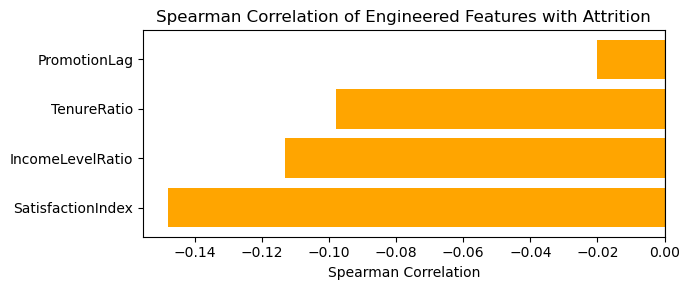

          Feature  Spearman Correlation
SatisfactionIndex                -0.148
 IncomeLevelRatio                -0.113
      TenureRatio                -0.098
     PromotionLag                -0.020


In [34]:
engineered_vars = ["TenureRatio", "PromotionLag", "IncomeLevelRatio", "SatisfactionIndex"]

eng_correlations = []
for col in engineered_vars:
    corr = df[[col, "Attrition"]].corr(method="spearman").iloc[0, 1]
    eng_correlations.append({"Feature": col, "Spearman Correlation": round(corr, 3)})

eng_corr_df = pd.DataFrame(eng_correlations).sort_values(
    "Spearman Correlation", key=abs, ascending=False
)


fig, ax = plt.subplots(figsize=(7, 3))
bar_colors = ["orange" if c < 0 else "blue" for c in eng_corr_df["Spearman Correlation"]]
ax.barh(eng_corr_df["Feature"], eng_corr_df["Spearman Correlation"], color=bar_colors)
ax.axvline(0, color="black", linewidth=0.8)
ax.set_title("Spearman Correlation of Engineered Features with Attrition")
ax.set_xlabel("Spearman Correlation")
plt.tight_layout()
plt.show()

print(eng_corr_df.to_string(index=False))

All four engineered features show a negative correlation with attrition, meaning employees with higher scores on these variables are less likely to leave. SatisfactionIndex has the strongest relationship (-0.148), followed by IncomeLevelRatio (-0.113) and TenureRatio (-0.098). PromotionLag is the weakest (-0.020) but still goes in the expected direction. All features carry some signal so we keep all four in the model.

### **4.4 Log Transformation of Skewed Variables**

From the EDA in Section 3.2.3, several continuous variables were confirmed to be right-skewed. We apply a log1p transformation to reduce this skewness, which helps Logistic Regression perform better. We use log1p instead of log because some employees have 0 values, and log(0)is undefined. The original columns are then dropped and replaced entirely by their log versions so there are no duplicates and we don't have twice the same information.

In [35]:

skewed_vars = [
    "MonthlyIncome",
    "DistanceFromHome",
    "YearsSinceLastPromotion",
    "YearsAtCompany",
    "TotalWorkingYears"

]
for col in skewed_vars:
    df[f"log_{col}"] = np.log1p(df[col])


skew_comparison = pd.DataFrame({
    "Original Skewness": [round(df[col].skew(), 3) for col in skewed_vars],
    "After log1p":       [round(df[f"log_{col}"].skew(), 3) for col in skewed_vars]
}, index=skewed_vars)

print("Skewness before and after log1p transformation:")
print("(Closer to 0 = more symmetric = better for Logistic Regression)")
display(skew_comparison)


df = df.drop(columns=skewed_vars)

print(f"df shape now: {df.shape}")

Skewness before and after log1p transformation:
(Closer to 0 = more symmetric = better for Logistic Regression)


Original Skewness  After log1p
MonthlyIncome                        1.370        0.286
DistanceFromHome                     0.958       -0.029
YearsSinceLastPromotion              1.984        0.719
YearsAtCompany                       1.765       -0.208
TotalWorkingYears                    1.117       -0.622

df shape now: (1470, 33)


The log1p transformation significantly reduced the skewness of all five variables. DistanceFromHome and YearsAtCompany are now very close to 0, meaning nearly symmetric. YearsSinceLastPromotion improved the most, dropping from 1.984 to 0.719. All variables are now much more suitable for Logistic Regression.

### **4.5 Define Final Feature Sets**

Here we define the final list of features that will enter the model. We need to redefine these because the feature lists from Section 2 were for EDA only and don't reflect the changes made in Section 4; the log-transformed columns, the new engineered features, and SatisfactionIndex replacing the four individual satisfaction variables. The categorical features will be one-hot encoded and the numerical features will be scaled.

In [36]:
TARGET = "Attrition"


categorical_features = [
    "BusinessTravel",
    "Department",
    "EducationField",
    "JobRole",
    "MaritalStatus"
]

# Numerical features; already numeric, will be Standard Scaled
numerical_features = [
    # Binary flags (already 0/1 from Section 2 encoding)
    "OverTime",
    "Gender",
    # Ordinal / Likert-scale variables
    "Education",
    "JobInvolvement",
    "JobLevel",
    "PerformanceRating",
    "StockOptionLevel",
    "TrainingTimesLastYear",
    # Continuous variables, not skewed, used as-is
    "Age",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "YearsInCurrentRole",
    "YearsWithCurrManager",
    "MonthlyRate",
    # Log-transformed versions, originals dropped in Section 4.4
    "log_MonthlyIncome",
    "log_DistanceFromHome",
    "log_YearsSinceLastPromotion",
    "log_YearsAtCompany",
    "log_TotalWorkingYears",
    "TenureRatio",
    "PromotionLag",
    "IncomeLevelRatio",
    "SatisfactionIndex"
]

all_features = categorical_features + numerical_features

print(f"Features entering the model: {len(all_features)} total")
print(f"Categorical (to be OHE-encoded): {len(categorical_features)}")
print(f"Numerical (to be scaled): {len(numerical_features)}")

Features entering the model: 28 total
Categorical (to be OHE-encoded): 5
Numerical (to be scaled): 23


### **4.6 Train / Test Split**

We split the data into 80% training and 20% test sets. We use stratify = y to make sure both sets keep the same ~16% attrition rate, and random_state = 42 so the split is reproducible. We split before preprocessing to avoid data leakage; if we scaled the full dataset first, the scaler would have seen the test data, which would make our evaluation results unreliable.

In [37]:
X = df[all_features]  
y = df[TARGET]        

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify = y        # preserve ~16% attrition rate in both sets
)


print(f"Total rows: {len(X)}")
print(f"Training rows: {len(X_train)}  ({len(X_train)/len(X):.0%})")
print(f"Test rows: {len(X_test)}   ({len(X_test)/len(X):.0%})")
print()
print(f"Attrition rate for Full dataset: {y.mean():.2%}")
print(f"Attrition rate for Y_train: {y_train.mean():.2%}  stratification preserved")
print(f"Attrition rate for Y_test: {y_test.mean():.2%}   stratification preserved")

Total rows: 1470
Training rows: 1176  (80%)
Test rows: 294   (20%)

Attrition rate for Full dataset: 16.12%
Attrition rate for Y_train: 16.16%  stratification preserved
Attrition rate for Y_test: 15.99%   stratification preserved


The attrition rate is consistent across all three sets (16.12%, 16.16%, 15.99%), confirming that stratification worked correctly.

### **4.7 Preprocessing Pipeline (ColumnTransformer)**

Before feeding the data into the model, we need to apply two transformations. StandardScaler is applied to all numerical features to put them on the same scale, since features with large ranges like MonthlyIncome would otherwise dominate over smaller ones. OneHotEncoder is applied to the categorical features to convert them into binary columns, with drop = "first" to avoid multicollinearity. The ColumnTransformer applies both at the same time and outputs a single feature matrix.

In [38]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(
        drop="first",             # avoids perfect multicollinearity in logistic regression
                                  
        handle_unknown="ignore",  
        sparse_output=False       
    ))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer,     numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"  
)

print("Preprocessor defined.")
print(f"StandardScaler: {len(numerical_features)} numerical columns")
print(f"OneHotEncoder: {len(categorical_features)} categorical columns")

Preprocessor defined.
StandardScaler: 23 numerical columns
OneHotEncoder: 5 categorical columns


### **4.8 Class Imbalance - Visualise & Strategy**

The dataset has around 84% No Attrition and 16% Attrition, which is imbalanced. To handle this we use class_weight = "balanced" in the Logistic Regression, which automatically gives more weight to the minority class during training so the model doesn't just ignore it. We decided against SMOTE since the imbalance is moderate enough that class_weight = "balanced" is sufficient on its own, and using both at the same time would overcorrect for the same problem.

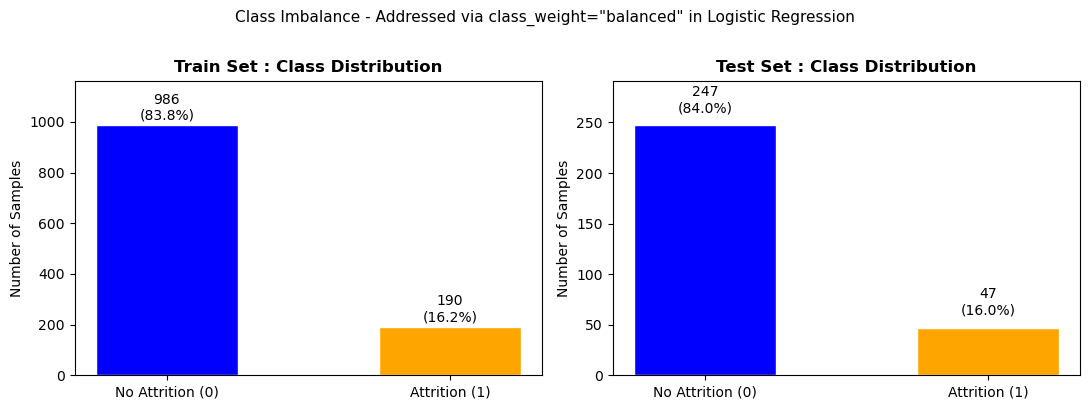

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

for ax, (split_name, split_y) in zip(axes, [("Train Set", y_train), ("Test Set", y_test)]):
    counts = pd.Series(split_y).value_counts().sort_index()
    bars = ax.bar(
        ["No Attrition (0)", "Attrition (1)"],
        counts.values,
        color=["blue", "orange"],
        edgecolor="white",
        width=0.5
    )
    ax.set_title(f"{split_name} : Class Distribution", fontsize=12, fontweight="bold")
    ax.set_ylabel("Number of Samples")
    ax.set_ylim(0, counts.values.max() * 1.18)
    for bar, val in zip(bars, counts.values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 10,
            f"{val}\n({val / len(split_y):.1%})",
            ha="center", va="bottom", fontsize=10
        )

plt.suptitle('Class Imbalance - Addressed via class_weight="balanced" in Logistic Regression',
             fontsize=11, y=1.01)
plt.tight_layout()
plt.show()

Both sets show a consistent split of around 84% No Attrition and 16% Attrition, confirming that stratification worked correctly. The imbalance is visible but moderate, and will be handled by class_weight="balanced" in the model.

### **4.9 Assemble Full Pipeline**

Here we combine the preprocessor and the model into a single Pipeline object. This keeps everything in one place, prevents data leakage during cross-validation, and makes it easy to swap the model later without changing anything else. We chose Logistic Regression as the first model because it is simple and interpretable, which is useful when explaining results to non-technical stakeholders like HR.

In [40]:
full_pipeline = Pipeline(steps=[

    ("preprocessor", preprocessor),
 
    # C=1.0, inverse regularization strength, will be tuned in Section 5
    # class_weight="balanced" penalises minority class misclassification proportionally
    # max_iter=1000 ensures convergence with many features (default 100 often insufficient)
    
    ("model", LogisticRegression(
        penalty="l2",
        C=1.0,
        class_weight="balanced",
        max_iter=1000,
        random_state=42
    ))
])

print("Full pipeline assembled:")
print()
for i, (name, obj) in enumerate(full_pipeline.steps, 1):
    print(f"Step {i}: [{name}]: {type(obj).__name__}")
print()


Full pipeline assembled:

Step 1: [preprocessor]: ColumnTransformer
Step 2: [model]: LogisticRegression



In [41]:
print(f"NaN in X_train : {X_train.isnull().sum().sum()}")
print(f"NaN in X_test  : {X_test.isnull().sum().sum()}")


print(f"\nX_train shape  : {X_train.shape}")
print(f"X_test shape   : {X_test.shape}")


print(f"\ny_train class counts:")
print(y_train.value_counts().sort_index().to_string())
print(f"\ny_test class counts:")
print(y_test.value_counts().sort_index().to_string())


full_pipeline.fit(X_train, y_train)
test_preds = full_pipeline.predict(X_test)
pred_counts = pd.Series(test_preds).value_counts().sort_index().to_dict()

print(f"\nPipeline fit and prediction: OK")
print(f"Predicted class distribution on test set : {pred_counts}")



n_features_out = full_pipeline[:-1].transform(X_train).shape[1]
print(f"\nFeatures after preprocessing (post-OHE): {n_features_out}")



NaN in X_train : 0
NaN in X_test  : 0

X_train shape  : (1176, 28)
X_test shape   : (294, 28)

y_train class counts:
Attrition
0    986
1    190

y_test class counts:
Attrition
0    247
1     47

Pipeline fit and prediction: OK
Predicted class distribution on test set : {0: 218, 1: 76}

Features after preprocessing (post-OHE): 42
